# Clean Data Analysis

In [57]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.metrics import pairwise
from dtaidistance import dtw
from math import dist
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mean_squared_error

In [58]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({"font.size": 18})

# Load Data

In [59]:
data_folder = os.path.join("..", "data")

clean_data_folder = os.path.join(data_folder, "clean_data")

In [60]:
tortosa_df = pd.read_excel(os.path.join(clean_data_folder, "tortosa.xlsx"))
guiamets_df = pd.read_excel(os.path.join(clean_data_folder, "guiamets.xlsx"))
mequinenza_df = pd.read_excel(os.path.join(clean_data_folder, "mequinenza.xlsx"))
xerta_df = pd.read_excel(os.path.join(clean_data_folder, "xerta.xlsx"))

In [61]:
# use same time period for all data
min_date = max(tortosa_df["DateTime"].min(), guiamets_df["DateTime"].min(), mequinenza_df["DateTime"].min(), xerta_df["DateTime"].min())
max_date = min(tortosa_df["DateTime"].max(), guiamets_df["DateTime"].max(), mequinenza_df["DateTime"].max(), xerta_df["DateTime"].max())

tortosa_df = tortosa_df[(tortosa_df["DateTime"] >= min_date) & (tortosa_df["DateTime"] <= max_date)]
guiamets_df = guiamets_df[(guiamets_df["DateTime"] >= min_date) & (guiamets_df["DateTime"] <= max_date)]
mequinenza_df = mequinenza_df[(mequinenza_df["DateTime"] >= min_date) & (mequinenza_df["DateTime"] <= max_date)]
xerta_df = xerta_df[(xerta_df["DateTime"] >= min_date) & (xerta_df["DateTime"] <= max_date)]

# Compare common variables

Common variables are:
* cumulated_rainfall_24h
* watertemperature
* conductivity

The idea is to combine every variable in a single dataset, which in this case is the Xerta dataset, firstly by comparing the redundant variables between each site and secondly by merging the selected variables into the Xerta df.

## Cumulated Rainfall

In [62]:
common_variable = 'cumulated_rainfall_24h'

<Axes: xlabel='DateTime', ylabel='cumulated_rainfall_24h'>

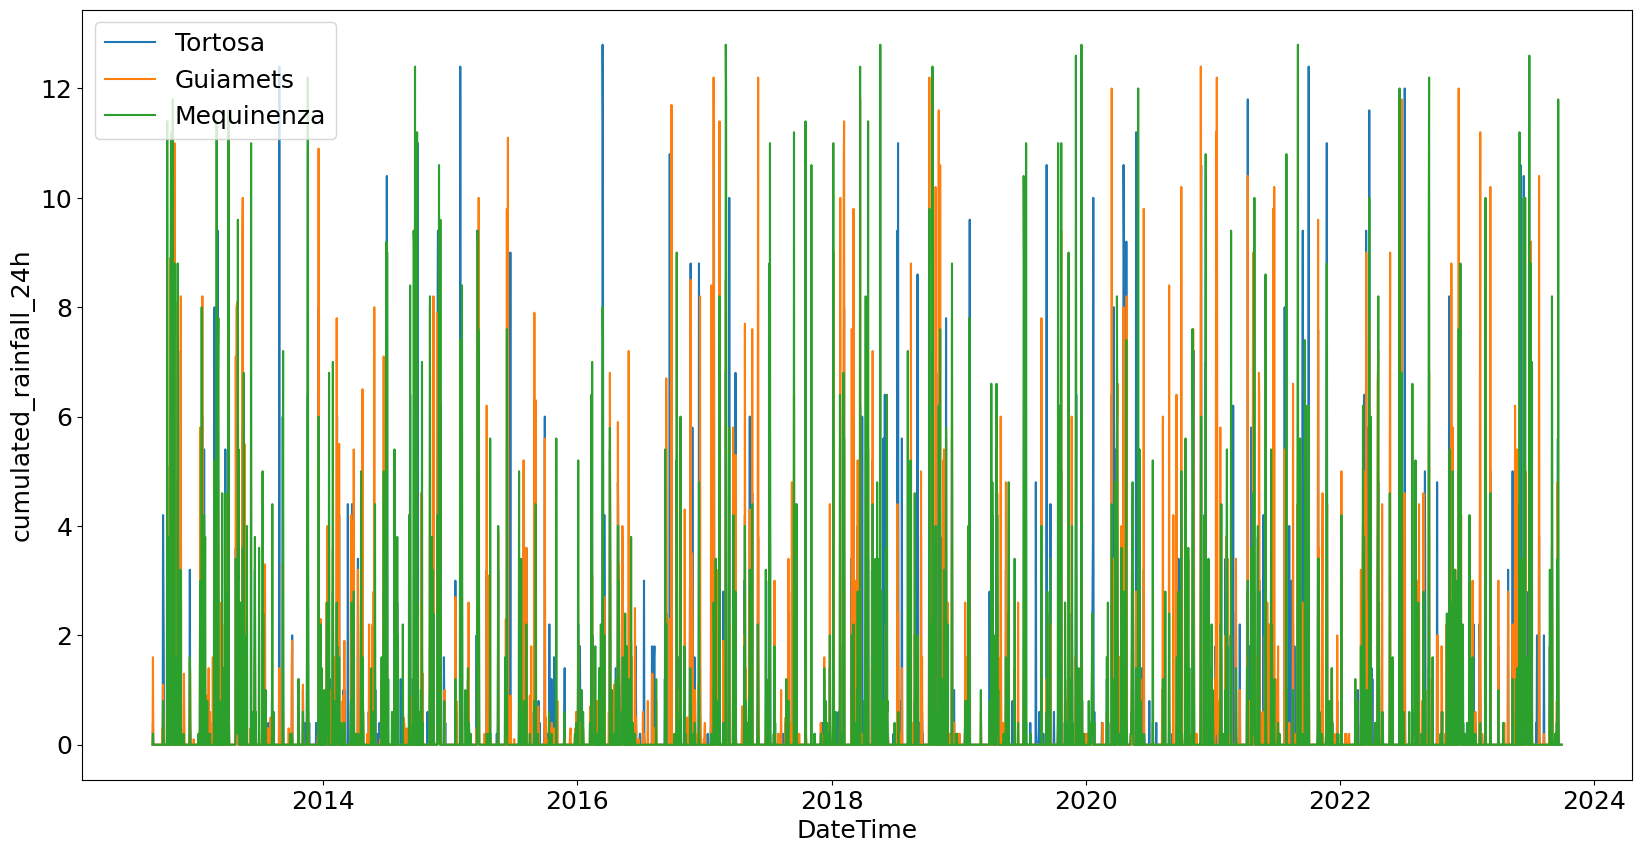

In [63]:
plt.figure()
sns.lineplot(x="DateTime", y=common_variable, data=tortosa_df, label="Tortosa")
sns.lineplot(x="DateTime", y=common_variable, data=guiamets_df, label="Guiamets")
sns.lineplot(x="DateTime", y=common_variable, data=mequinenza_df, label="Mequinenza")

### Pearson

#### Tortosa - Mequinenza

In [64]:
stats.pearsonr(tortosa_df[common_variable], mequinenza_df[common_variable])

PearsonRResult(statistic=0.4464827327458532, pvalue=1.0461144524195183e-197)

#### Tortosa - Guiamets

In [65]:
stats.pearsonr(tortosa_df[common_variable], guiamets_df[common_variable])

PearsonRResult(statistic=0.5468638600912722, pvalue=1.0425319104e-314)

#### Mequinenza - Guiamets

In [66]:
stats.pearsonr(mequinenza_df[common_variable], guiamets_df[common_variable])

PearsonRResult(statistic=0.4977105760314717, pvalue=1.5776778216815755e-252)

### Cosine Similarity

#### Tortosa - Mequinenza

In [67]:
pairwise.cosine_similarity(tortosa_df[common_variable].values.reshape(1, -1), mequinenza_df[common_variable].values.reshape(1, -1))

array([[0.4922023]])

#### Tortosa - Guiamets

In [68]:
pairwise.cosine_similarity(tortosa_df[common_variable].values.reshape(1, -1), guiamets_df[common_variable].values.reshape(1, -1))

array([[0.58623884]])

#### Mequinenza - Guiamets

In [69]:
pairwise.cosine_similarity(mequinenza_df[common_variable].values.reshape(1, -1), guiamets_df[common_variable].values.reshape(1, -1))

array([[0.54132852]])

### RMSE

#### Tortosa - Mequinenza

In [70]:
rmse = np.sqrt(mean_squared_error(tortosa_df[common_variable], mequinenza_df[common_variable]))
rmse / np.std(tortosa_df[common_variable])

1.1735904055493

#### Tortosa - Guiamets

In [71]:
rmse = np.sqrt(mean_squared_error(tortosa_df[common_variable], guiamets_df[common_variable]))
rmse / np.std(tortosa_df[common_variable])

1.039643880958664

#### Mequinenza - Guiamets

In [72]:
rmse = np.sqrt(mean_squared_error(mequinenza_df[common_variable], guiamets_df[common_variable]))
rmse / np.std(tortosa_df[common_variable])

1.1847862208021926

### Kendall-Tau

#### Tortosa - Mequinenza

In [73]:
stats.kendalltau(tortosa_df[common_variable], mequinenza_df[common_variable])

SignificanceResult(statistic=0.5053216596285368, pvalue=1.964325334820815e-273)

#### Tortosa - Guiamets

In [74]:
stats.kendalltau(tortosa_df[common_variable], guiamets_df[common_variable])

SignificanceResult(statistic=0.6136311060430757, pvalue=0.0)

#### Mequinenza - Guiamets

In [75]:
stats.kendalltau(mequinenza_df[common_variable], guiamets_df[common_variable])

SignificanceResult(statistic=0.5875719246436335, pvalue=0.0)

## Water Temperature

In [45]:
common_variable = 'watertemperature'

<Axes: xlabel='DateTime', ylabel='watertemperature'>

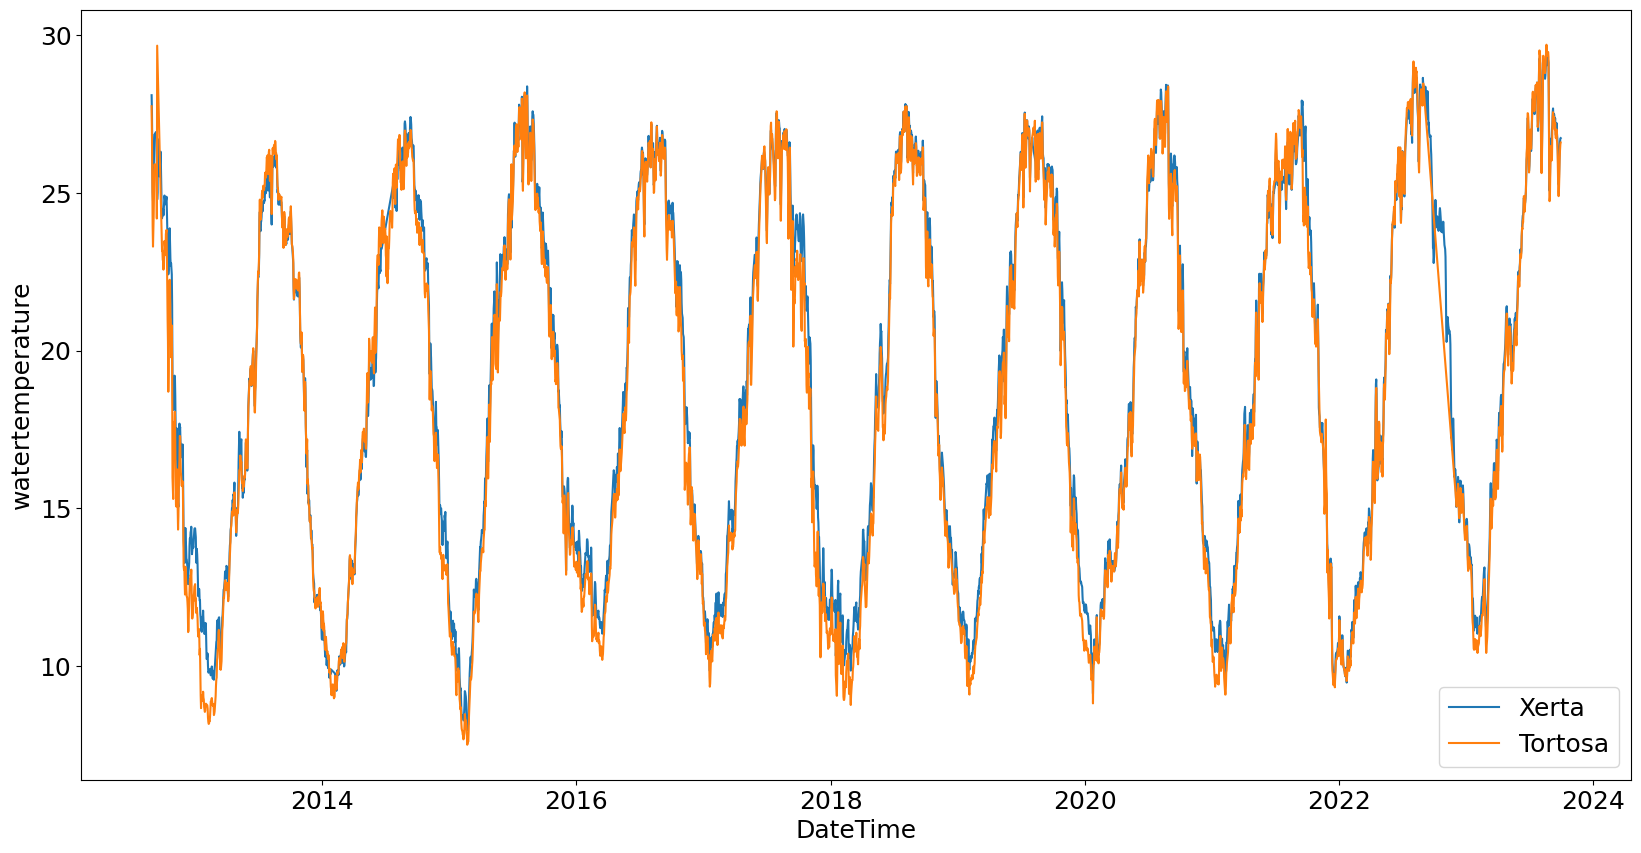

In [46]:
plt.figure()
sns.lineplot(x="DateTime", y=common_variable, data=xerta_df, label="Xerta")
sns.lineplot(x="DateTime", y=common_variable, data=tortosa_df, label="Tortosa")

### Pearson

In [47]:
stats.pearsonr(tortosa_df[common_variable], xerta_df[common_variable])

PearsonRResult(statistic=0.9955453119521628, pvalue=0.0)

### Cosine Similarity

In [48]:
pairwise.cosine_similarity(tortosa_df[common_variable].values.reshape(1, -1), xerta_df[common_variable].values.reshape(1, -1))

array([[0.99947627]])

### RMSE

In [49]:
rmse = np.sqrt(mean_squared_error(tortosa_df[common_variable], xerta_df[common_variable]))
rmse / np.std(tortosa_df[common_variable])

0.12275068020264455

### Kendall-Tau

In [50]:
stats.kendalltau(tortosa_df[common_variable], xerta_df[common_variable])

SignificanceResult(statistic=0.9421496993880751, pvalue=0.0)

## Conductivity

In [51]:
common_variable = 'conductivity'

<Axes: xlabel='DateTime', ylabel='conductivity'>

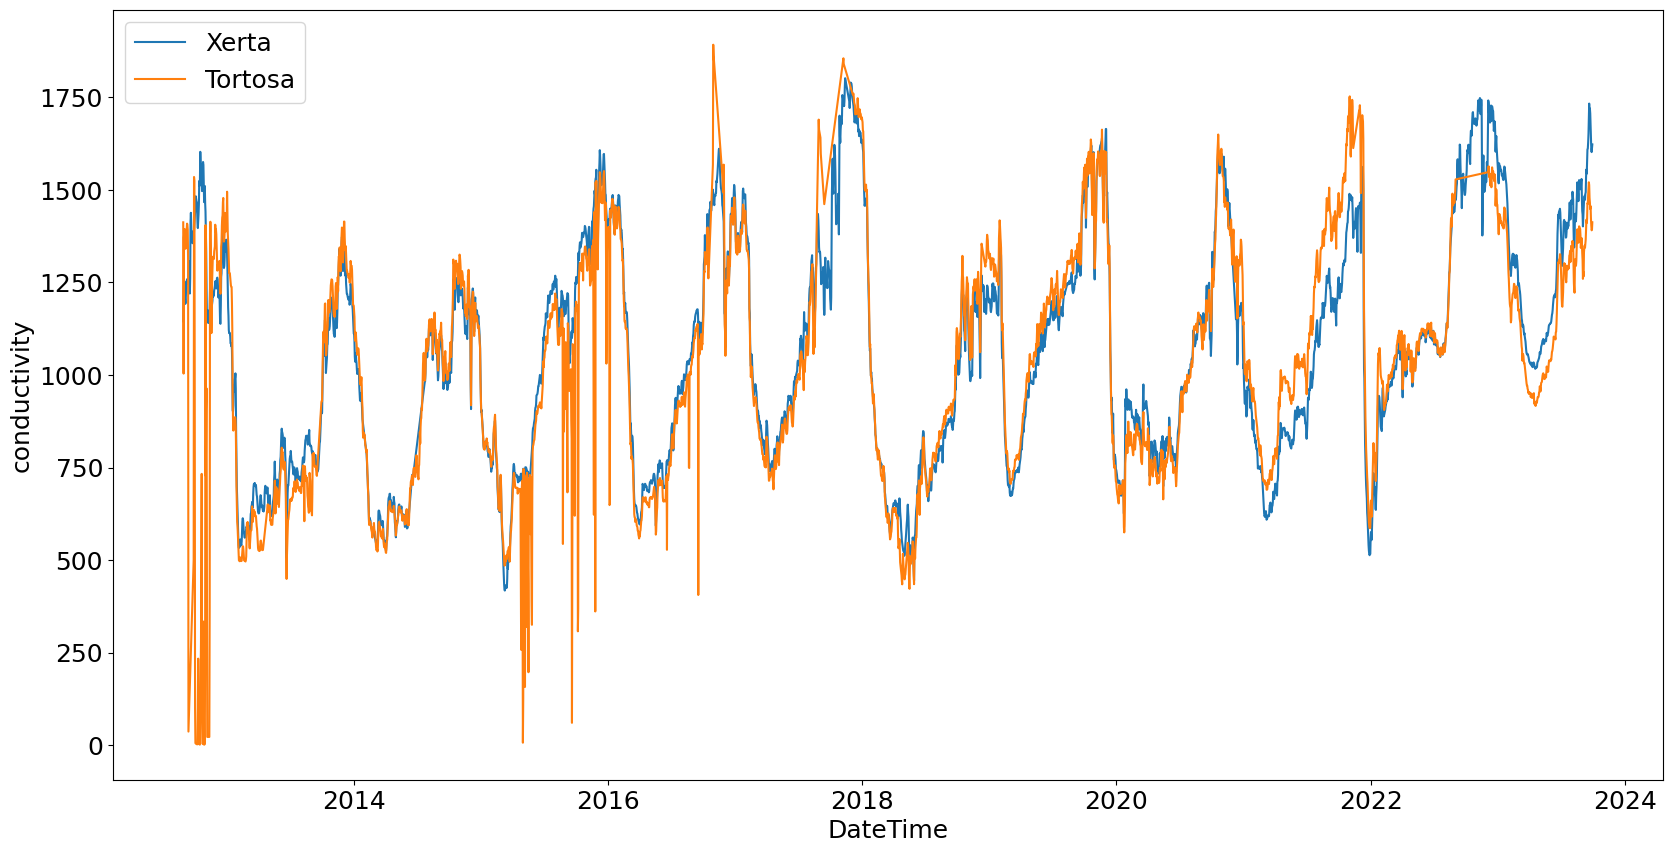

In [52]:
plt.figure()
sns.lineplot(x="DateTime", y=common_variable, data=xerta_df, label="Xerta")
sns.lineplot(x="DateTime", y=common_variable, data=tortosa_df, label="Tortosa")

### Pearson

In [53]:
stats.pearsonr(tortosa_df[common_variable], xerta_df[common_variable])

PearsonRResult(statistic=0.8533514147726787, pvalue=0.0)

### Cosine Similarity

In [54]:
pairwise.cosine_similarity(tortosa_df[common_variable].values.reshape(1, -1), xerta_df[common_variable].values.reshape(1, -1))

array([[0.98682836]])

### RMSE

In [55]:
rmse = np.sqrt(mean_squared_error(tortosa_df[common_variable], xerta_df[common_variable]))
rmse / np.std(tortosa_df[common_variable])

0.5256203180148664

### Kendall-Tau

In [56]:
stats.kendalltau(tortosa_df[common_variable], xerta_df[common_variable])

SignificanceResult(statistic=0.803637662903869, pvalue=0.0)

# Build unique dataset

In [78]:
# water temperature and conductivity are better in the xerta dataset so no need to merge with tortosa
xerta_df['cumulated_rainfall_24h'] = mequinenza_df['cumulated_rainfall_24h'].values
xerta_df['environment_temperature'] = guiamets_df['environmental_temperature'].values
xerta_df['flowriver'] = tortosa_df['flowriver'].values

xerta_df.rename(
    columns={
        "cumulated_rainfall_24h": "Daily Cumulated Rainfall",
        "watertemperature": "Water Temperature",
        "environment_temperature": "Air Temperature",
        "flowriver": "Flow",
        "conductivity": "Conductivity",
        "dissolvedoxygen": "Dissolved Oxygen",
        "nitrate": "Nitrate",
        "redoxpotential": "Redox Potential",
        "turbidity": "Turbidity",
    },
    inplace=True,
)

In [83]:
xerta_df.set_index('DateTime', inplace=True)

In [84]:
xerta_df

Nitrate  ABS254    pH  Ammonium  Dissolved Oxygen  \
DateTime                                                        
2012-08-29     5.54   9.070  8.31      0.01              4.71   
2012-08-30     5.56  15.130  8.29      0.02              4.75   
2012-08-31     5.51  15.950  8.31      0.04              5.08   
2012-09-01     5.49  15.525  8.40      0.06              5.68   
2012-09-02     5.39  15.100  8.43      0.15              5.98   
...             ...     ...   ...       ...               ...   
2023-09-26     7.56   3.970  8.30      0.03              5.46   
2023-09-27     7.28   3.810  8.29      0.02              5.33   
2023-09-28     7.34   3.760  8.27      0.02              5.23   
2023-09-29     7.64   4.180  8.25      0.03              5.17   
2023-09-30     8.14   4.110  8.23      0.02              5.12   

            Redox Potential  Turbidity  Water Temperature  Conductivity  \
DateTime                                                                  
2012-08-29           220.47       3.42              28.10       1144.98   
2012-08-30           225.81       3.10              27.57       1205.67   
2012-08-31           229.83       3.60              26.37       1237.20   
2012-09-01           231.82       4.00              25.04       1254.15   
2012-09-02           234.80       3.97              24.75       1244.10   
...                     ...        ...                ...           ...   
2023-09-26           227.69       3.96              25.95       1628.49   
2023-09-27           227.02       4.16              26.37       1610.67   
2023-09-28           228.25       3.80              26.60       1602.33   
2023-09-29           230.54       3.89              26.73       1613.81   
2023-09-30           232.39       3.93              26.74       1623.03   

            Daily Cumulated Rainfall  Air Temperature    Flow  
DateTime                                                       
2012-08-29                       0.0            27.02  100.82  
2012-08-30                       0.2            22.49   97.40  
2012-08-31                       0.0            21.03   95.59  
2012-09-01                       0.0            17.81   94.97  
2012-09-02                       0.0            19.43   95.48  
...                              ...              ...     ...  
2023-09-26                       0.0            20.50   83.50  
2023-09-27                       0.0            21.76   81.17  
2023-09-28                       0.0            22.17   81.42  
2023-09-29                       0.0            22.03   80.71  
2023-09-30                       0.0            22.28   81.00  

[4050 rows x 12 columns]

# Timeseries decomposition

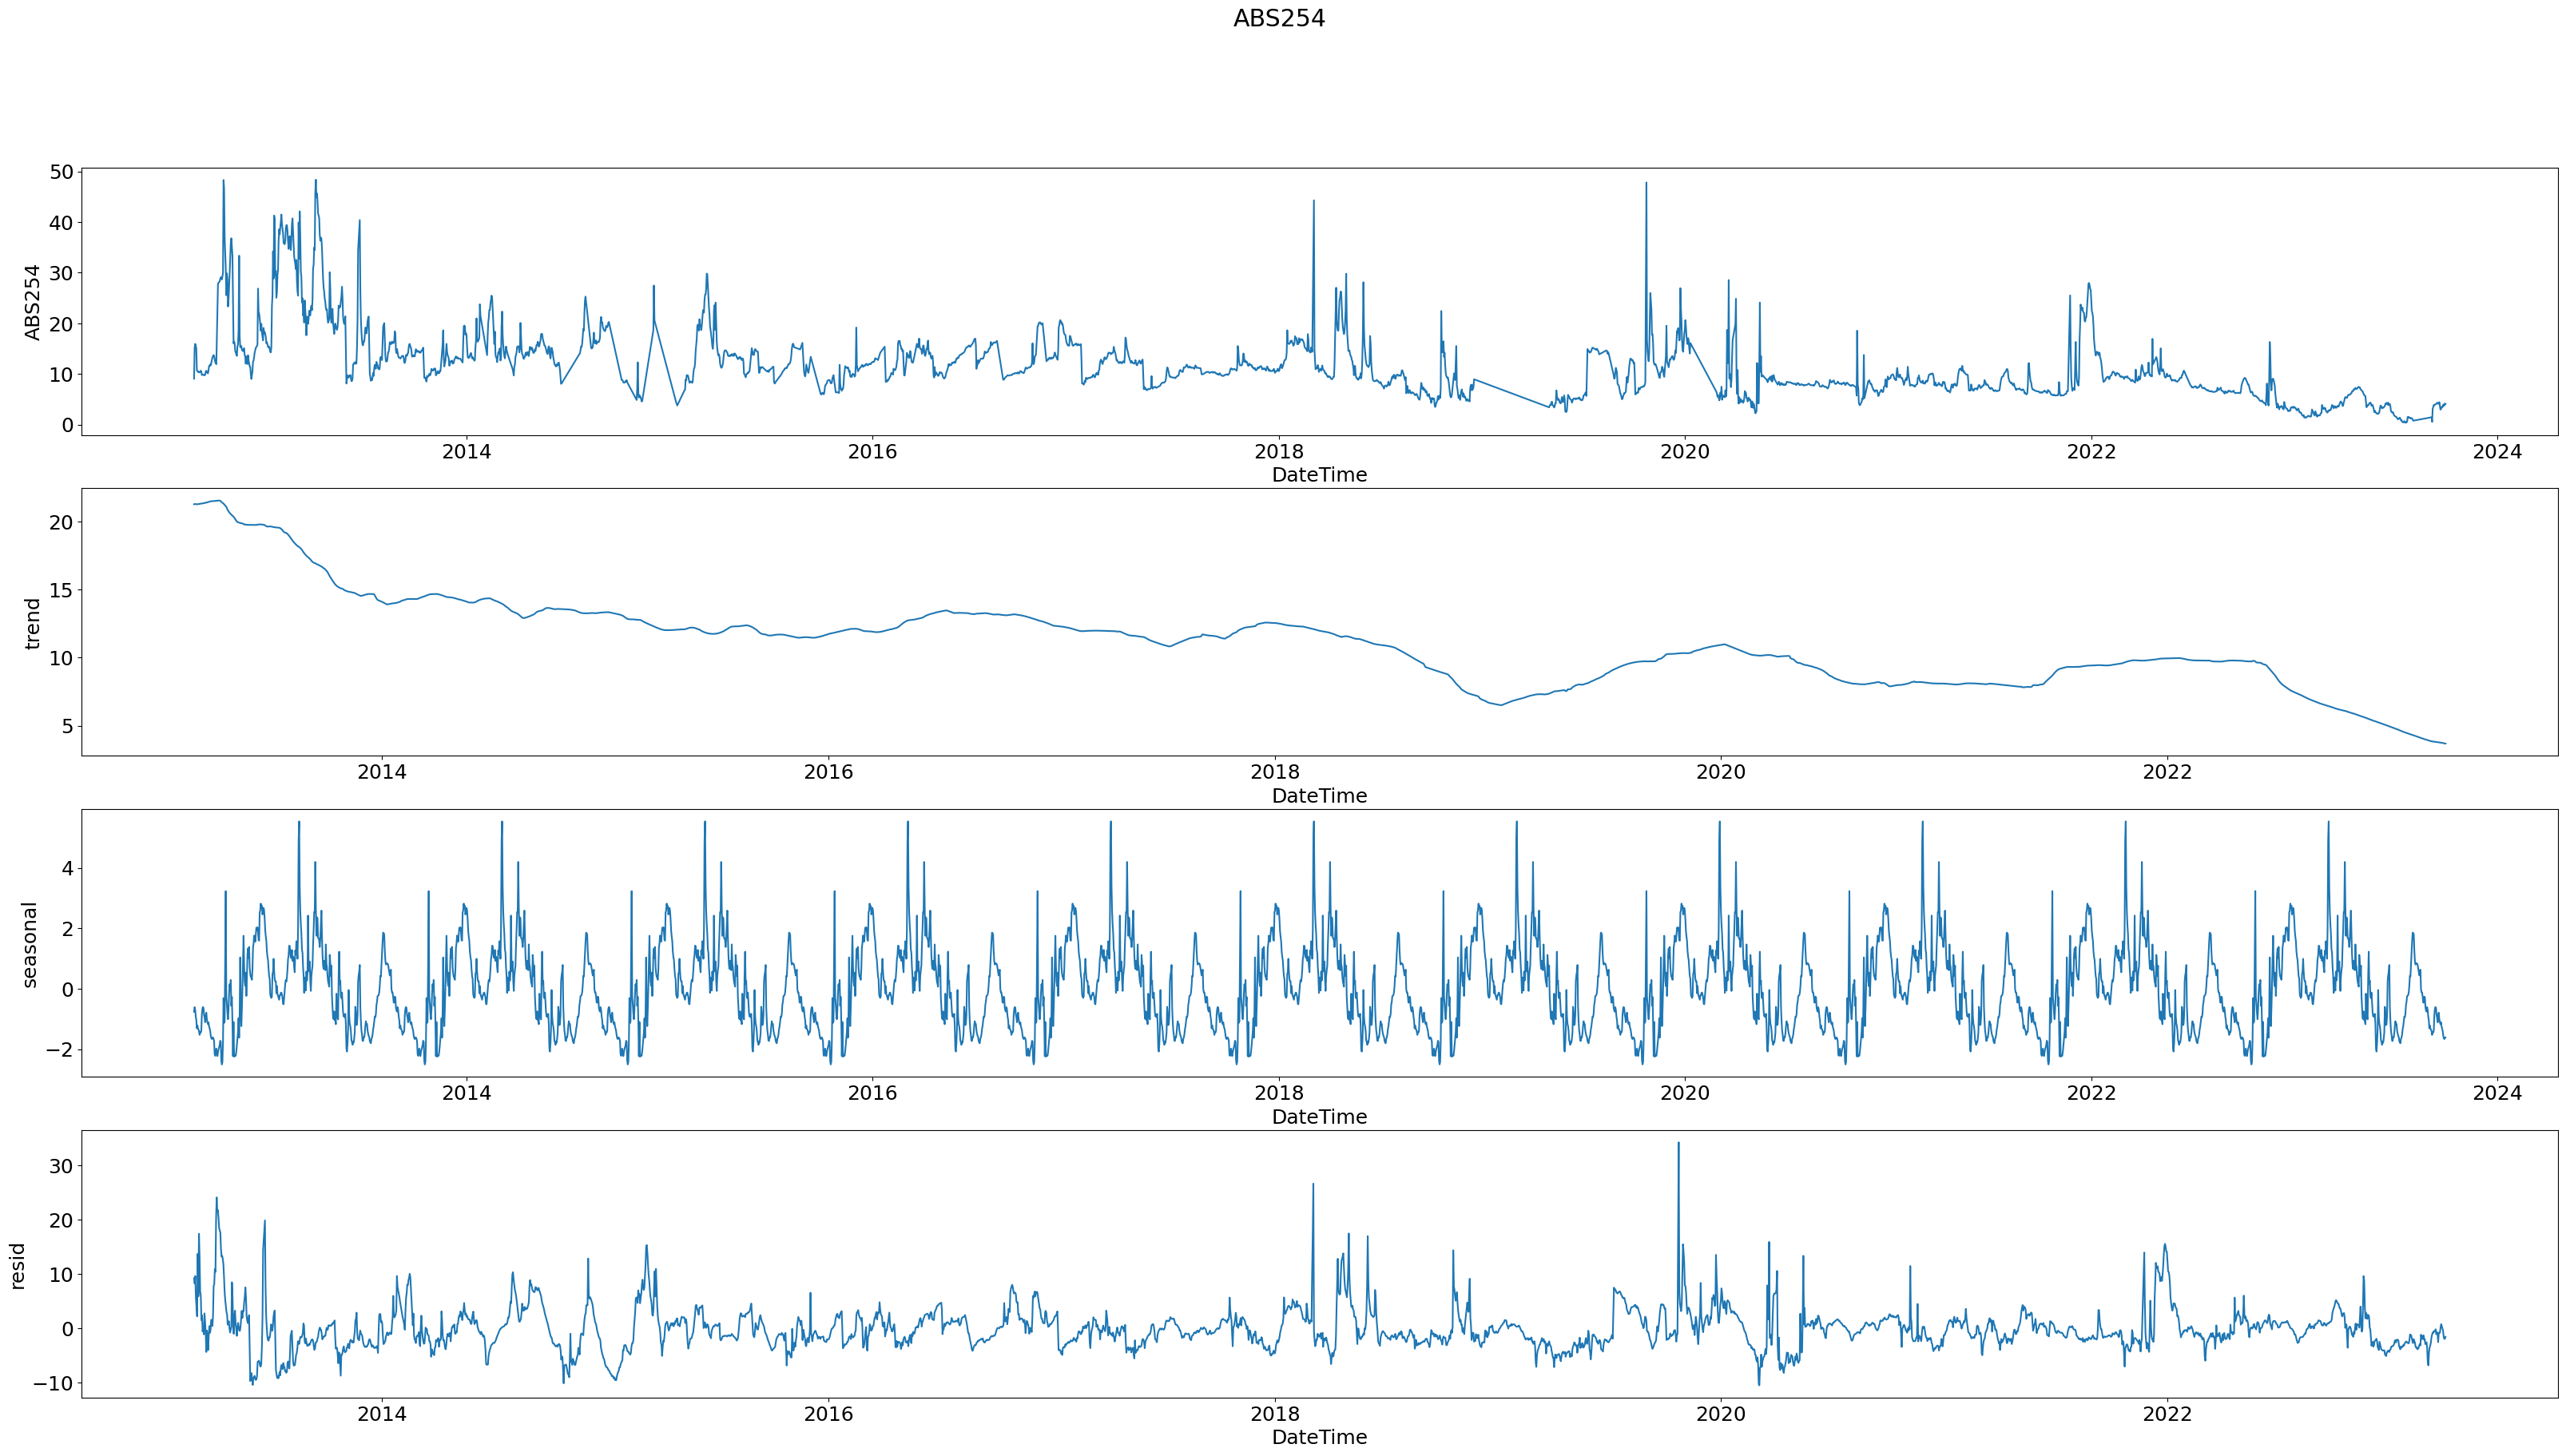

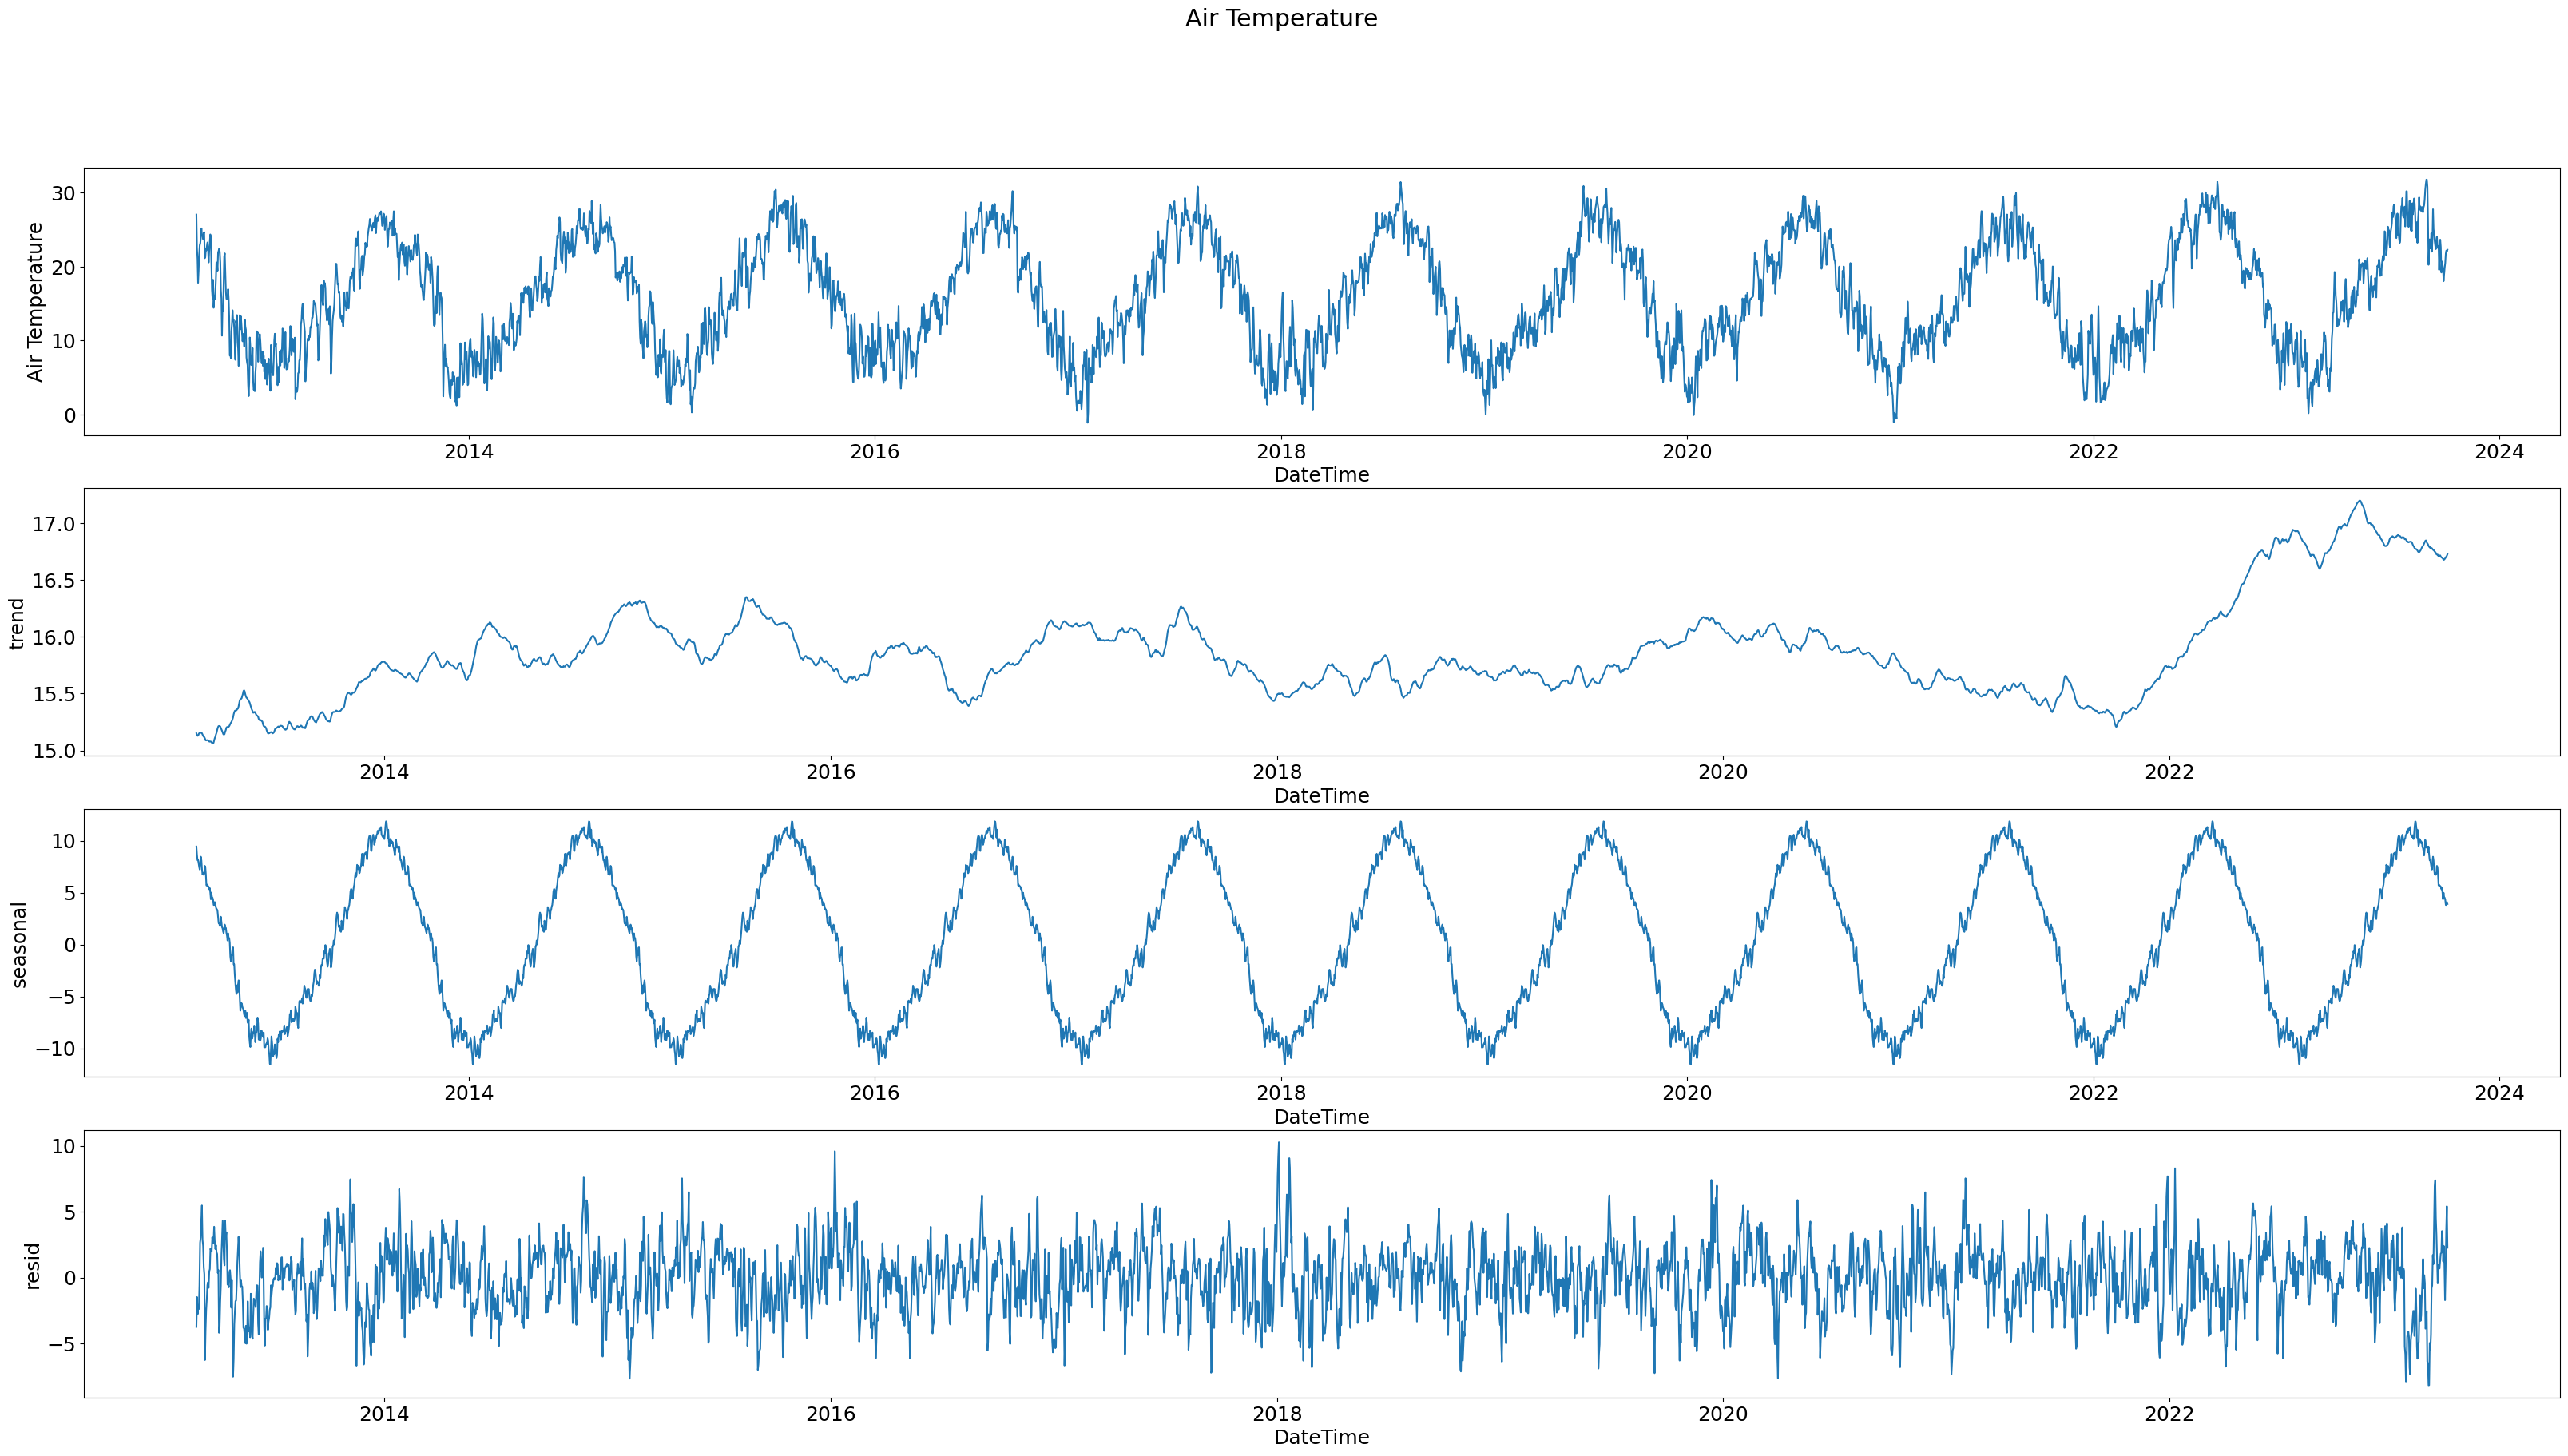

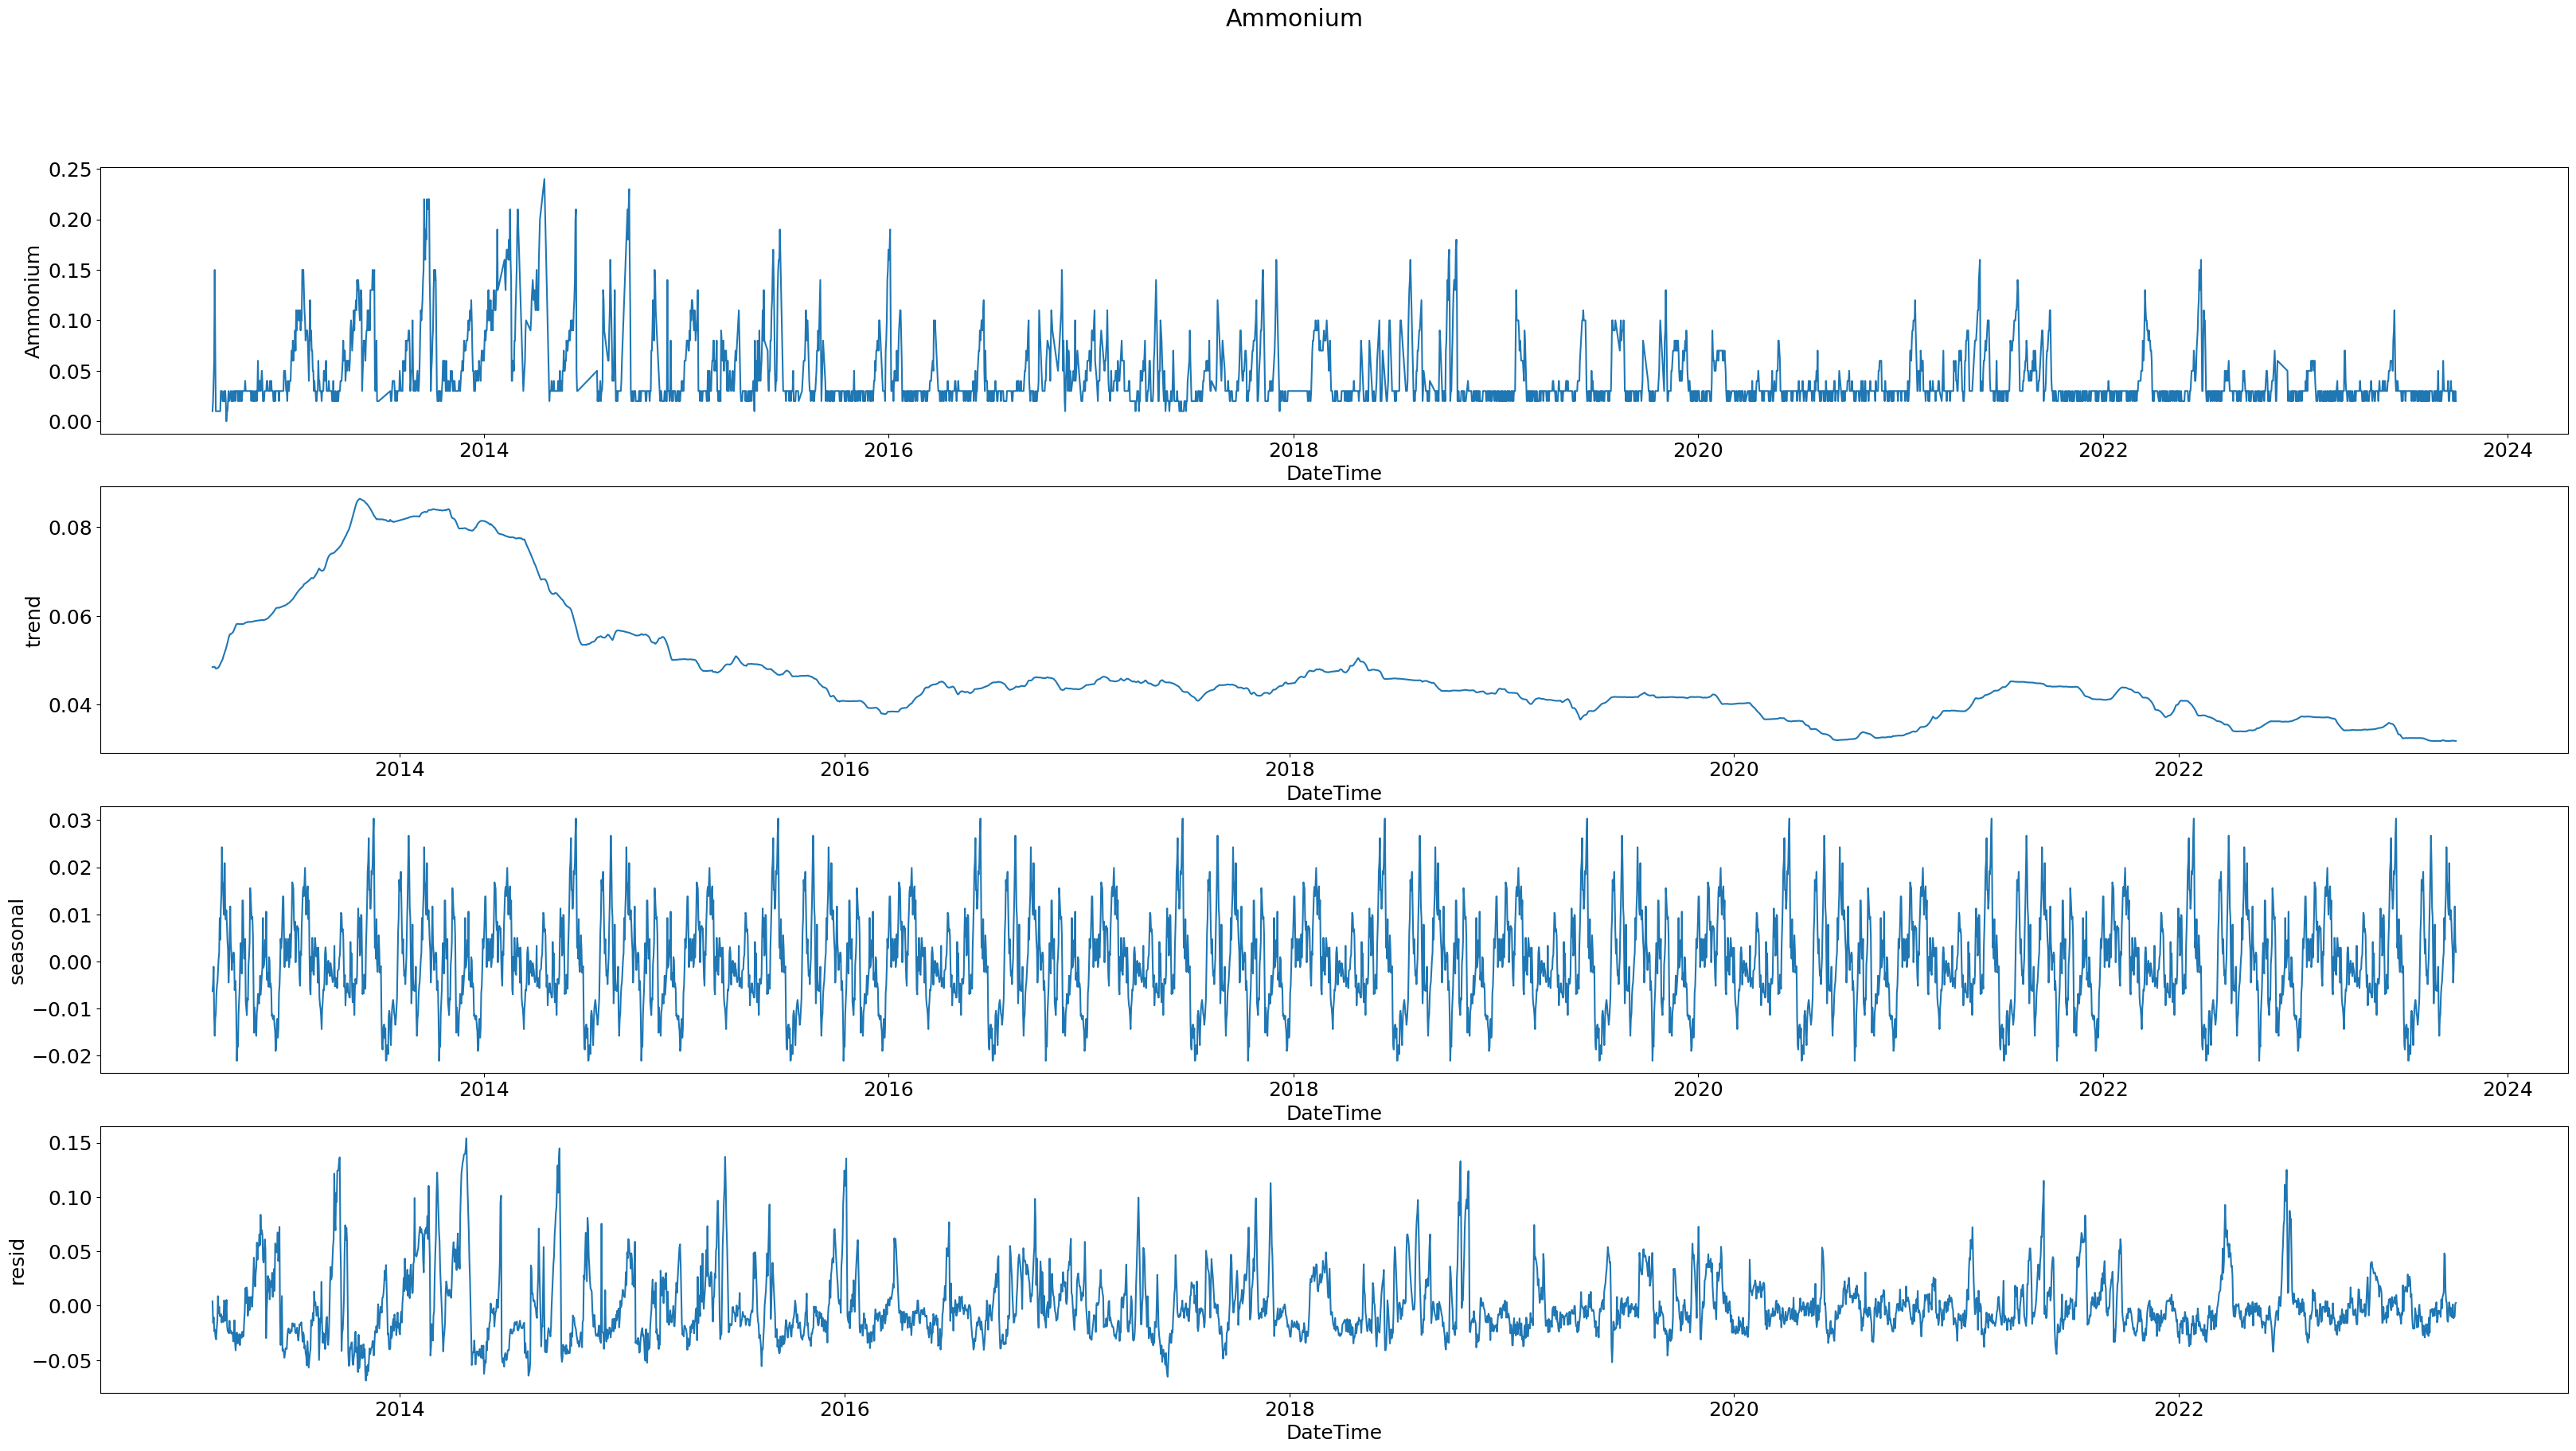

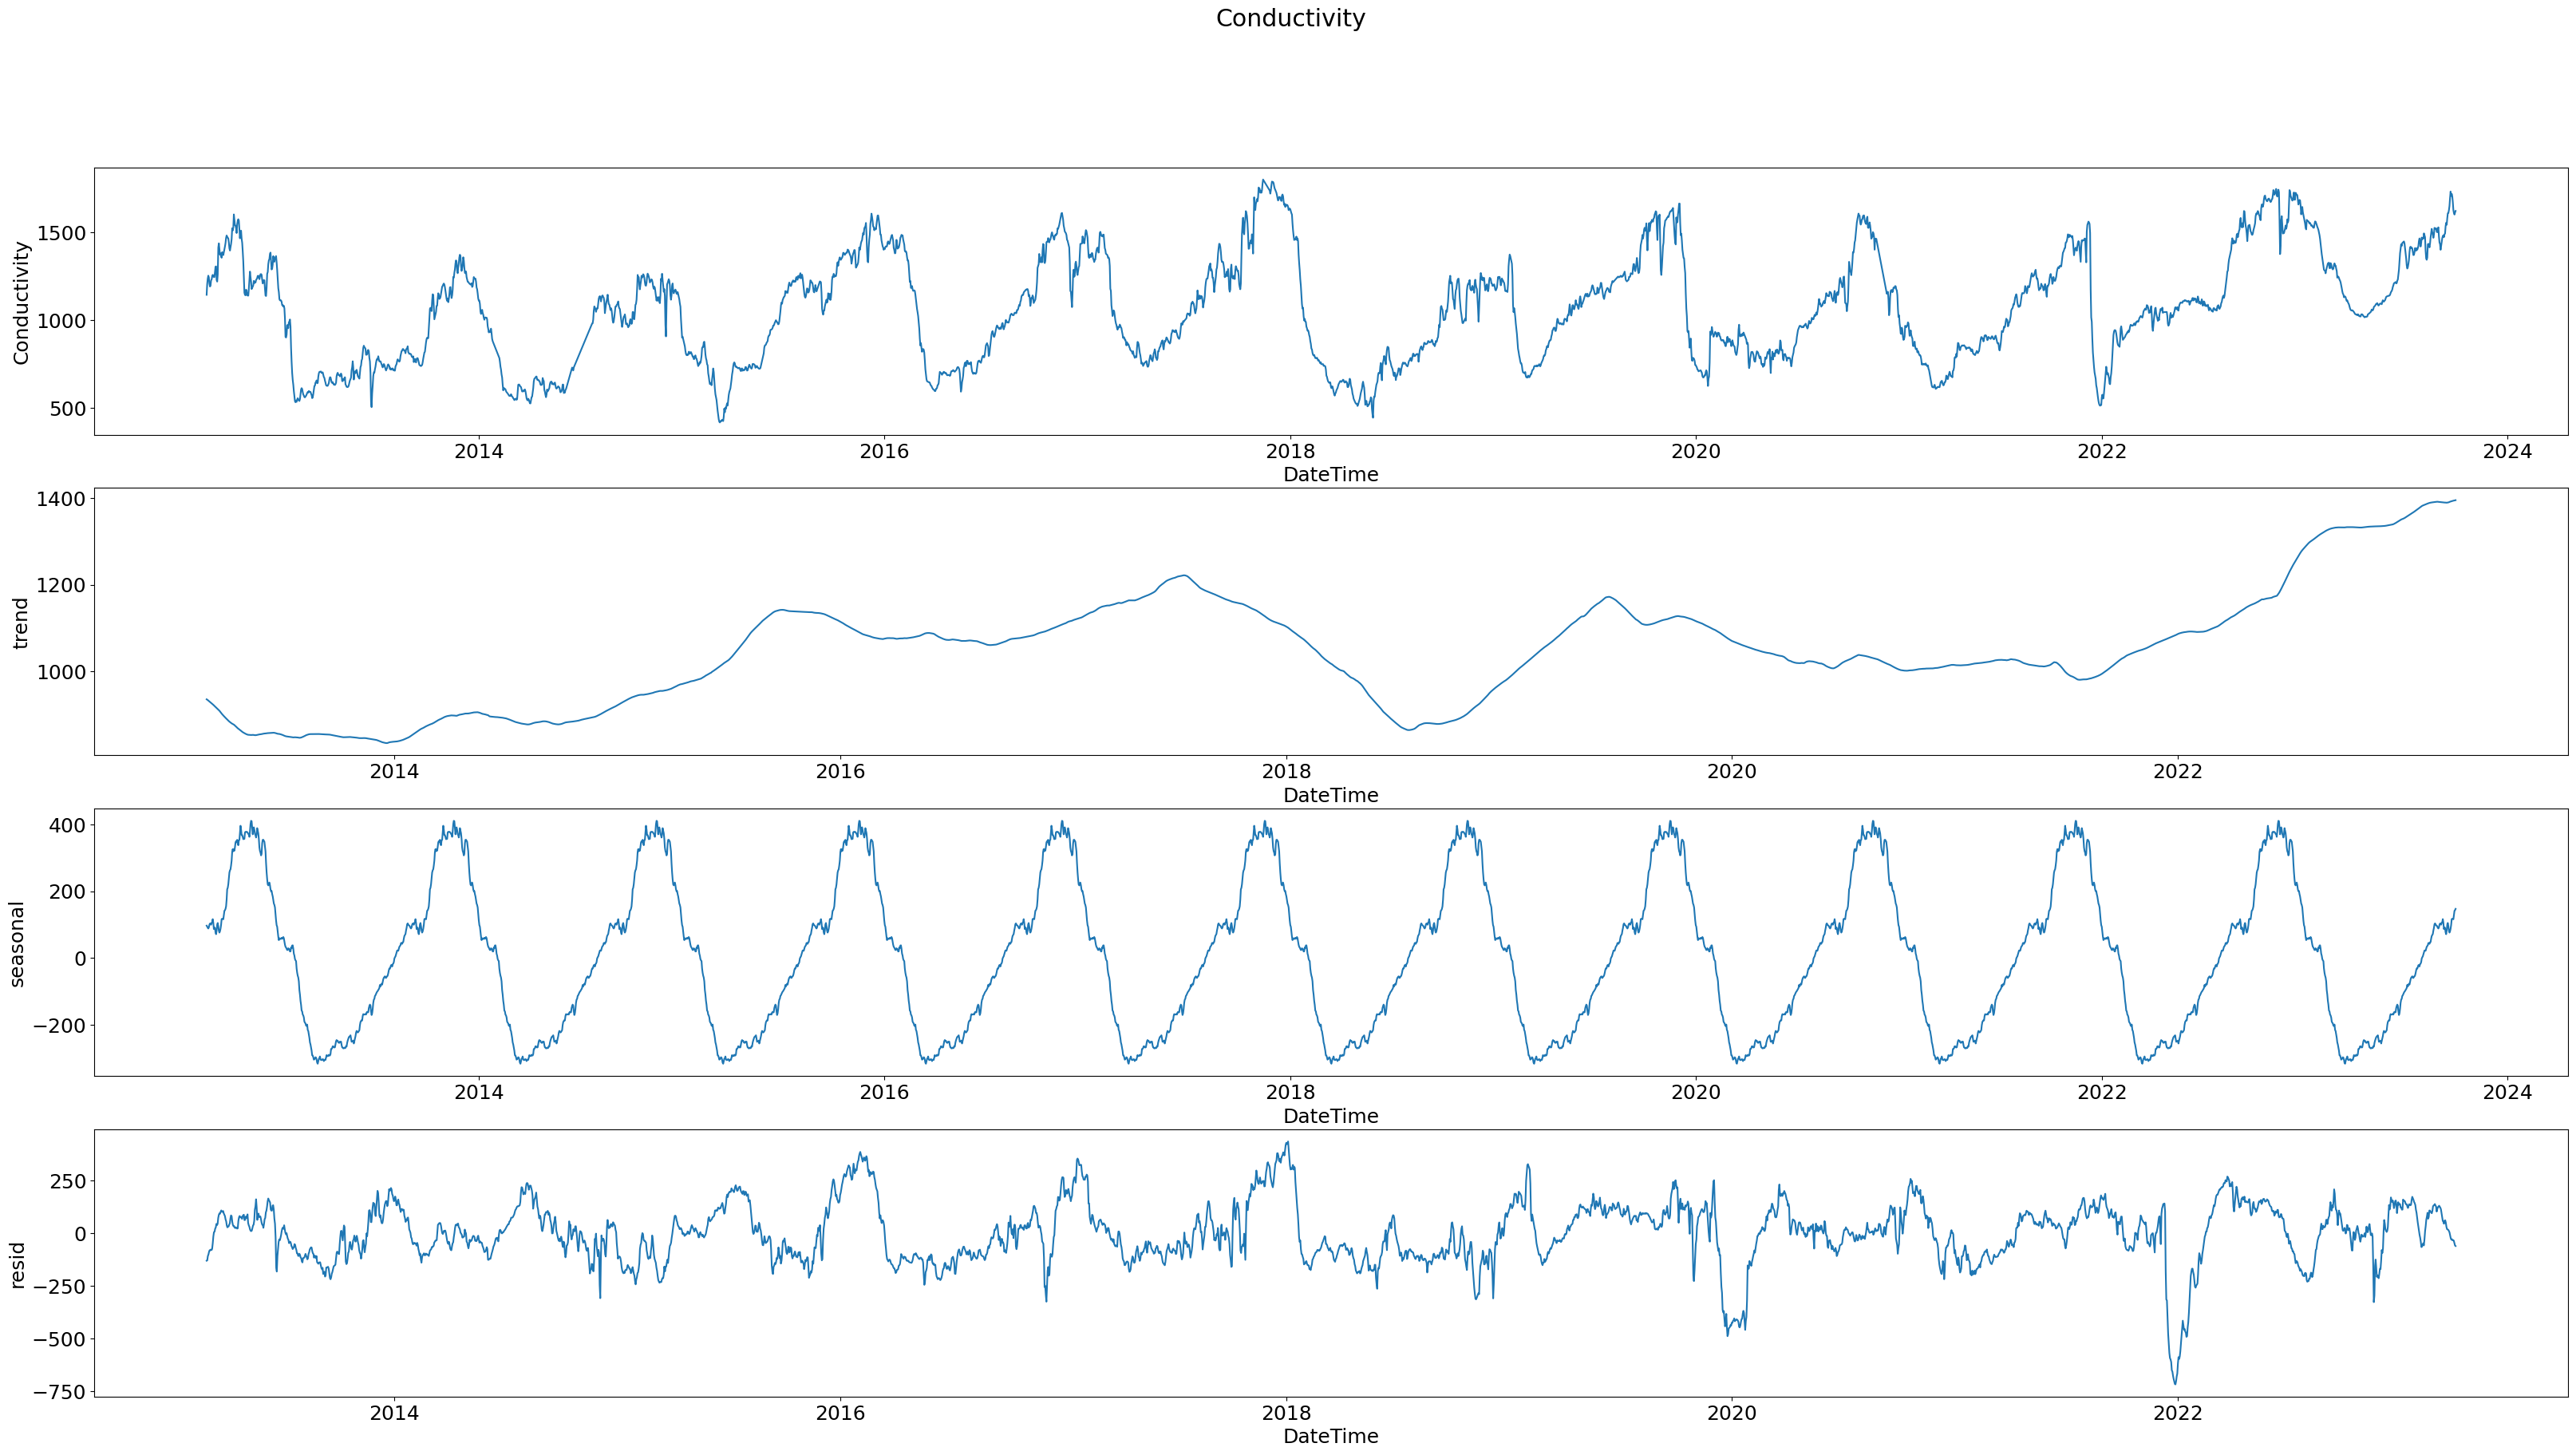

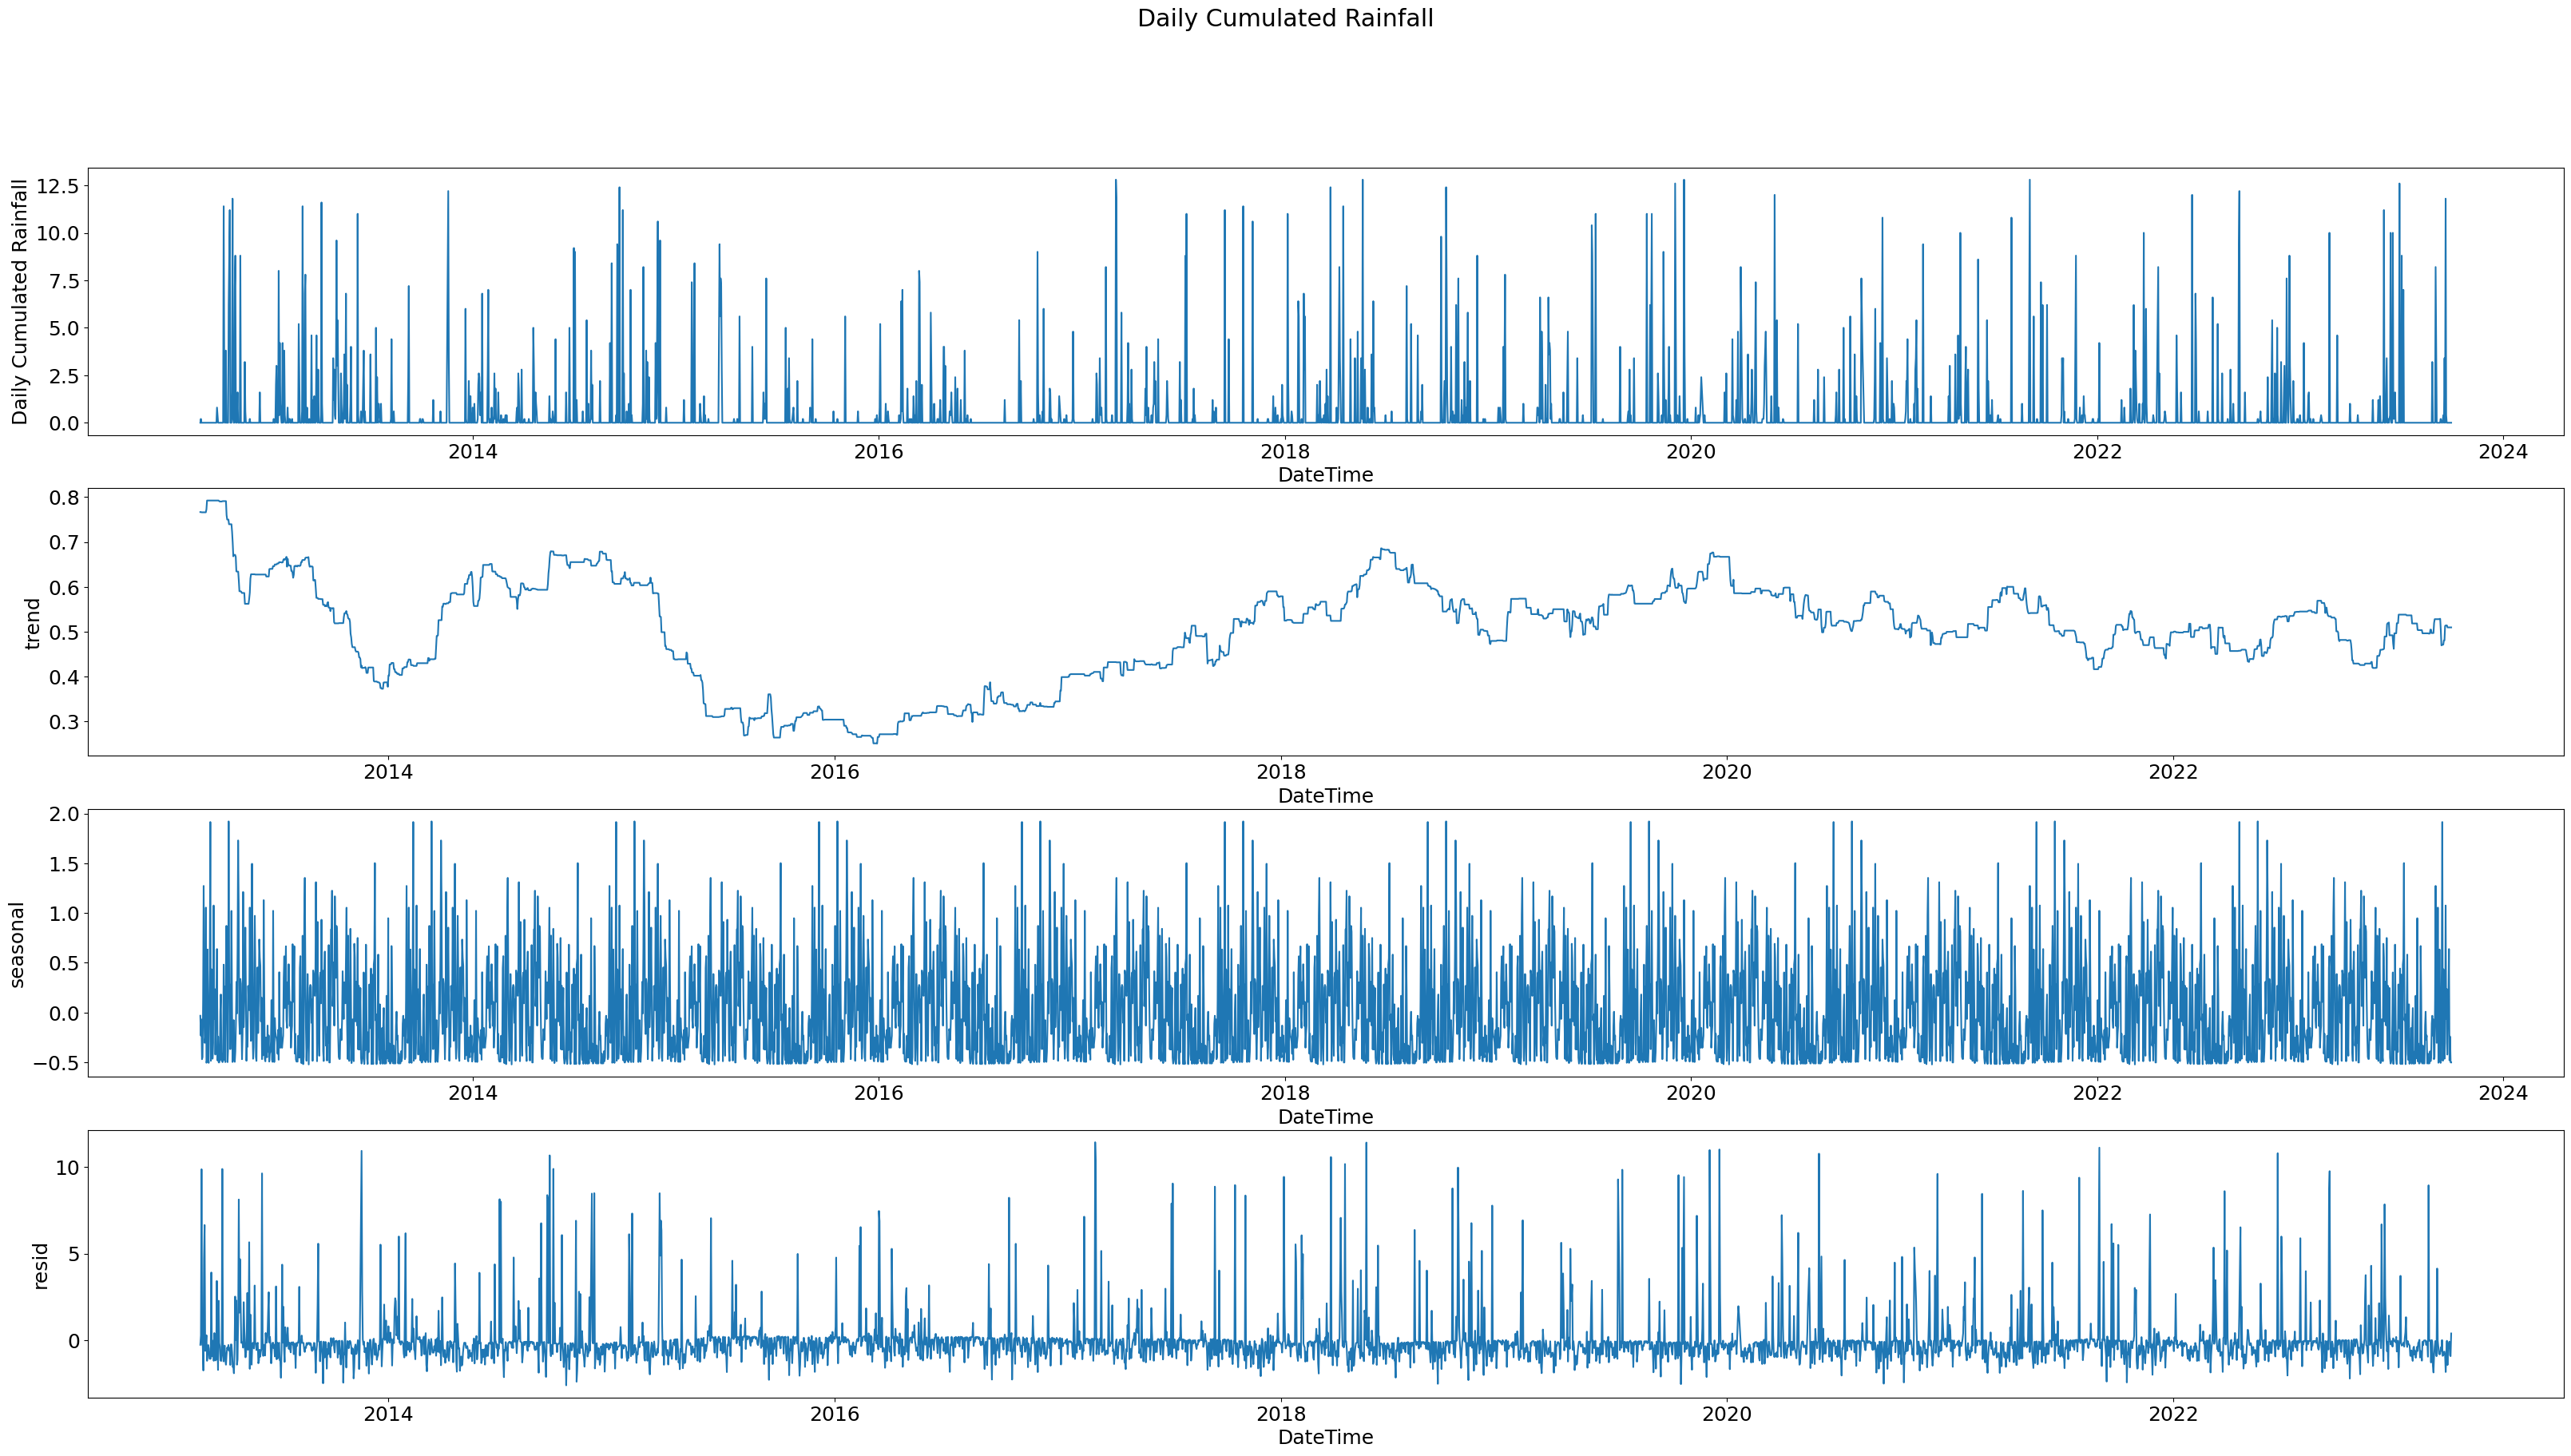

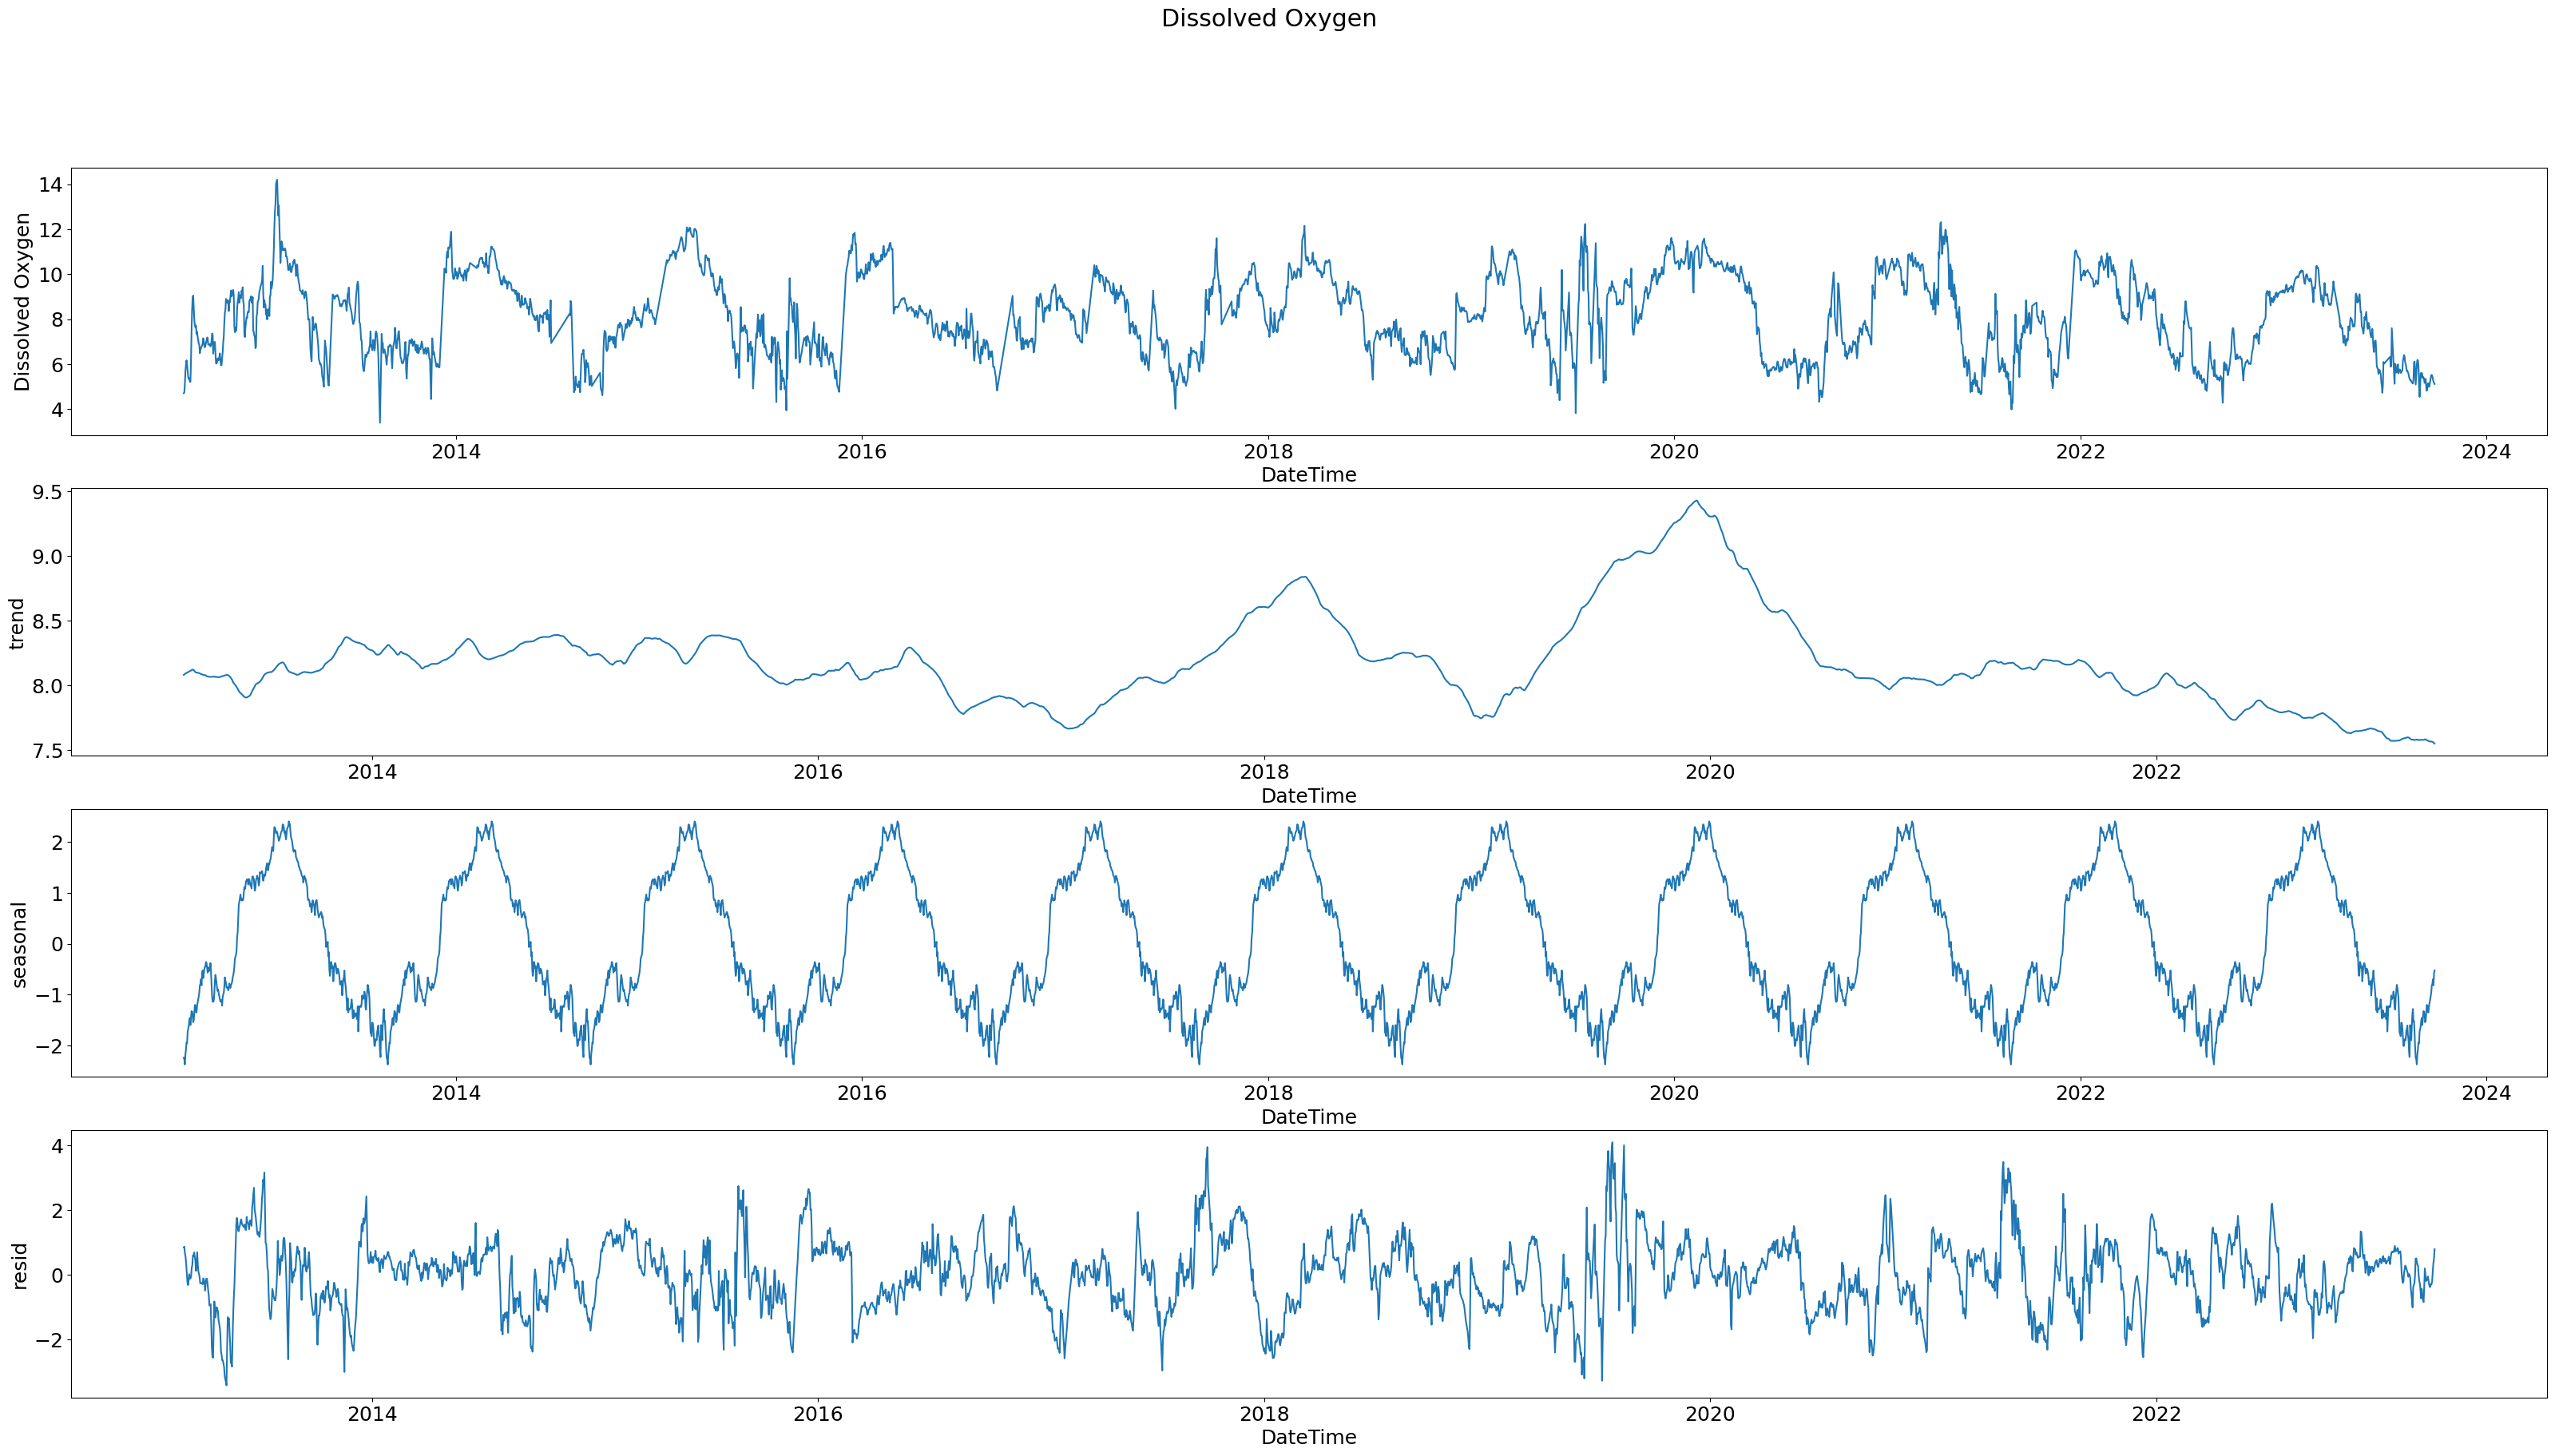

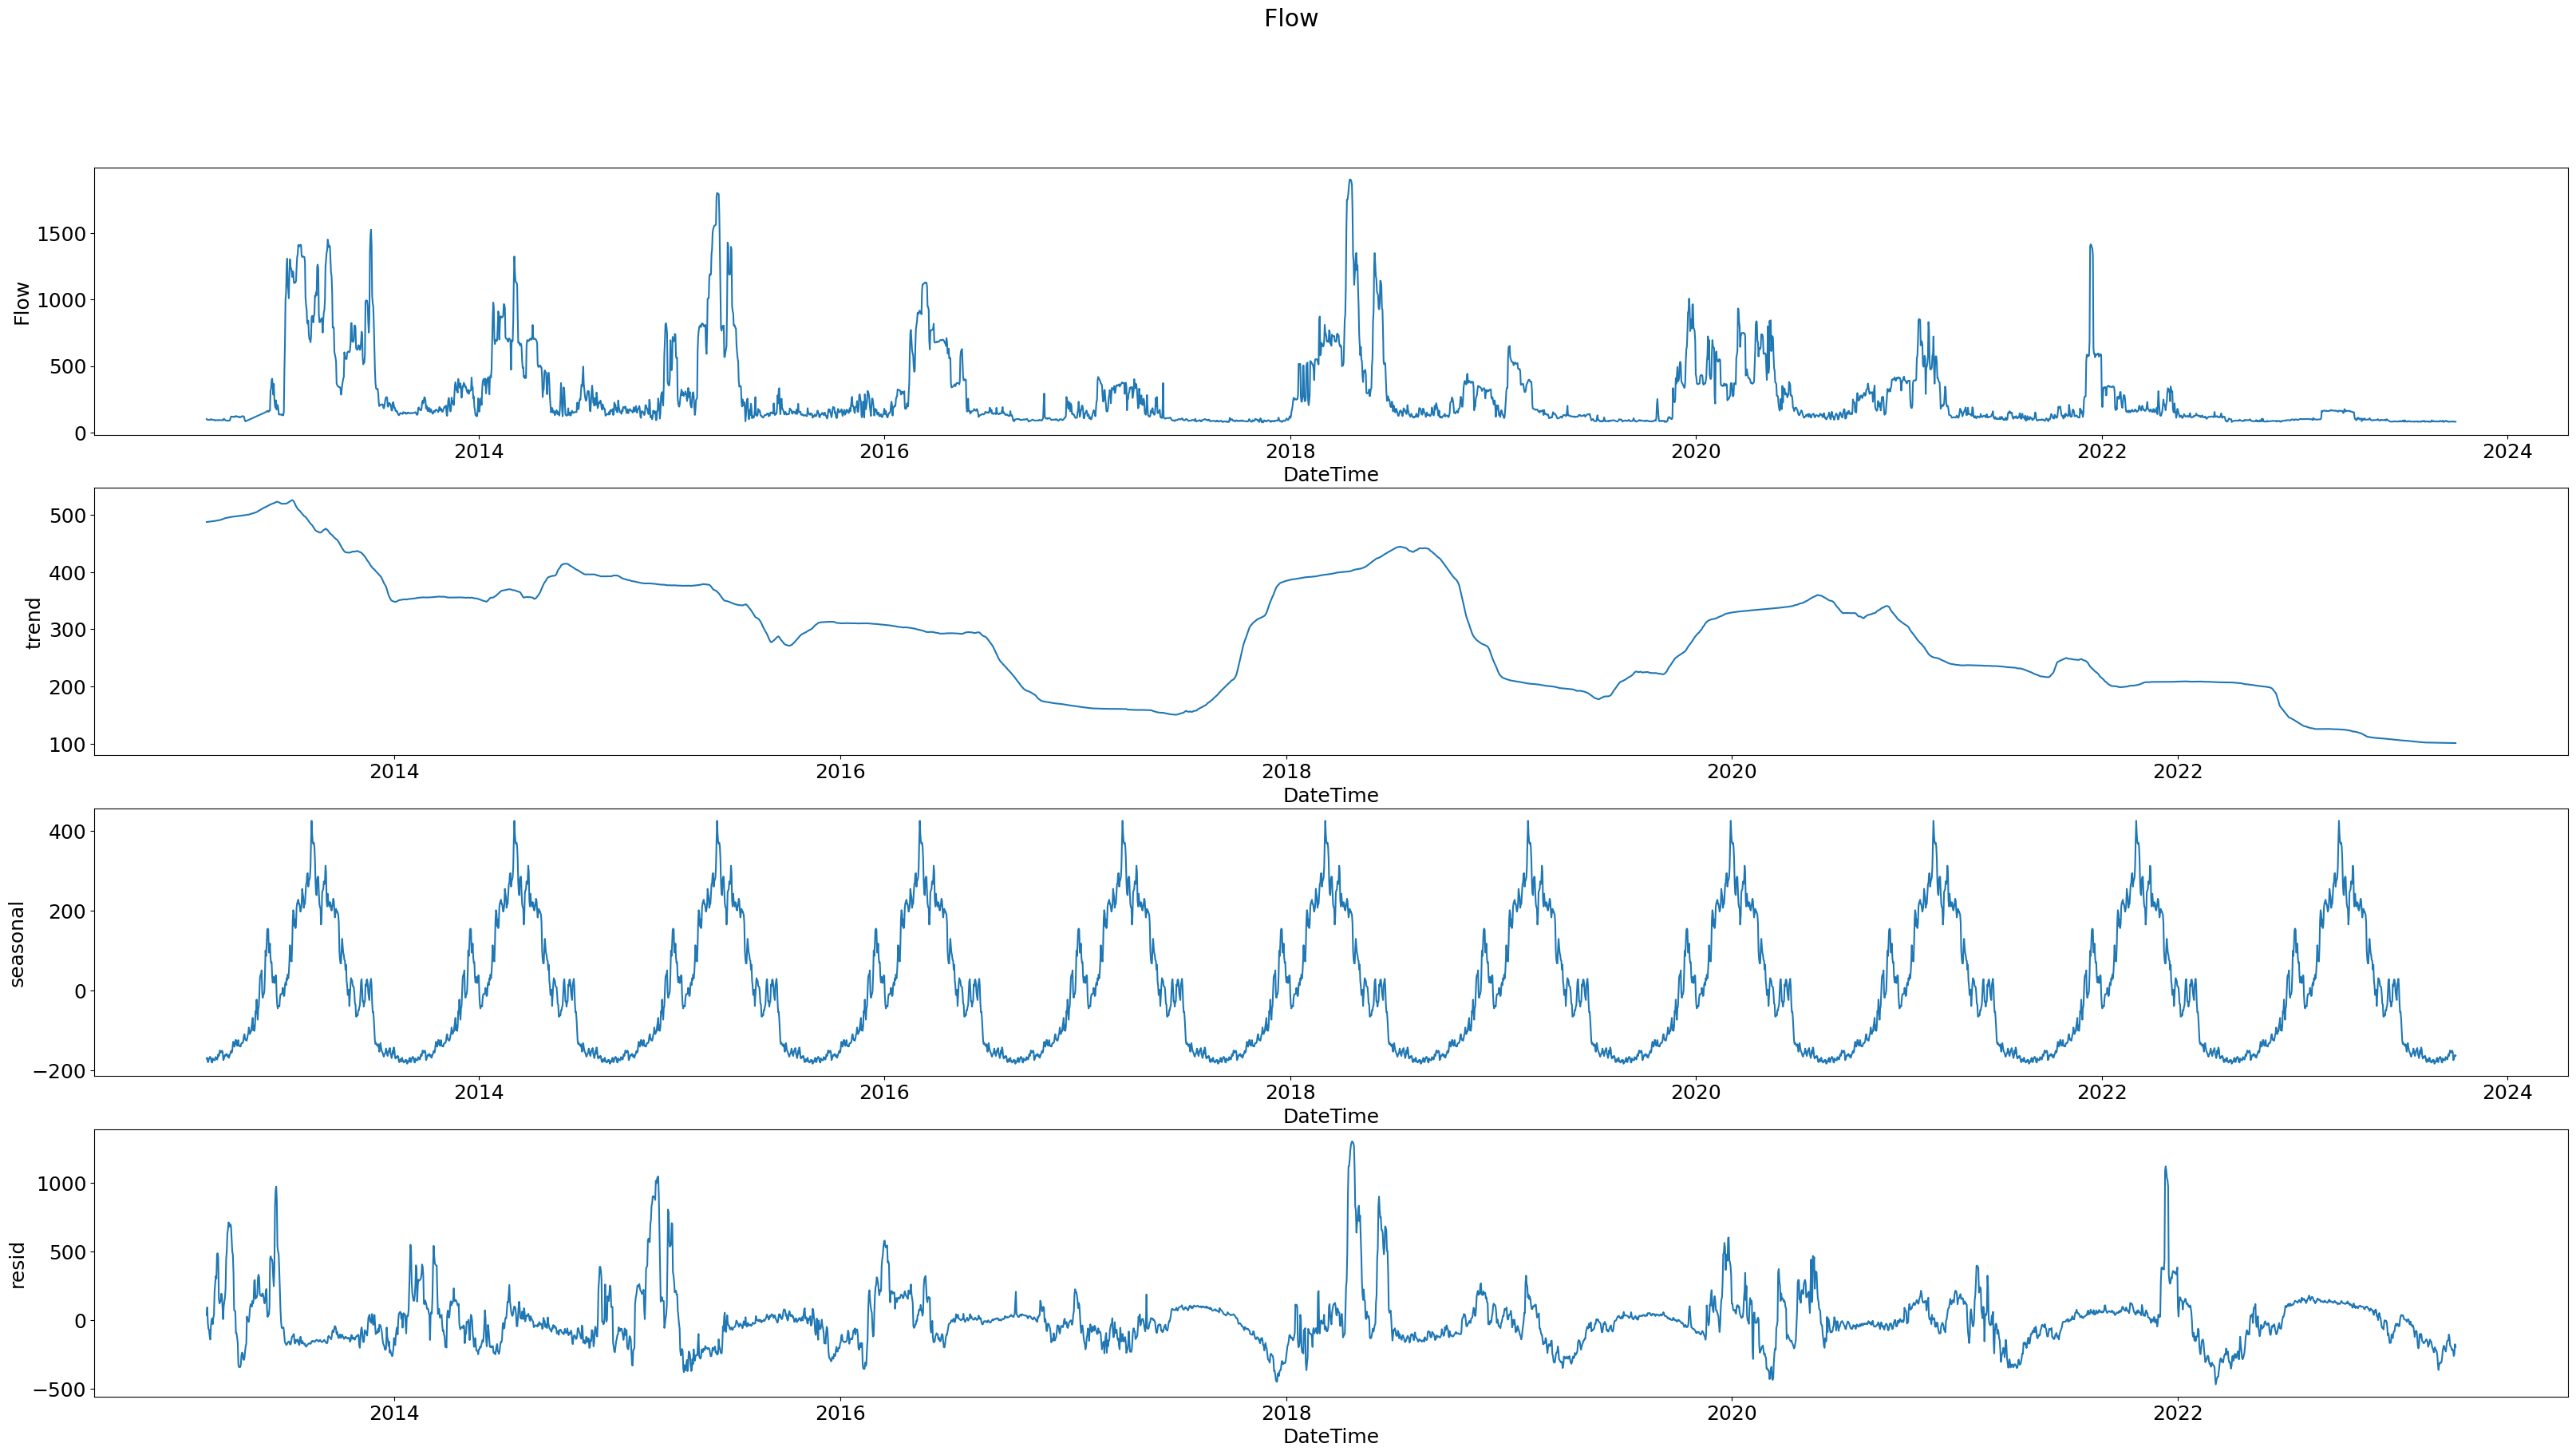

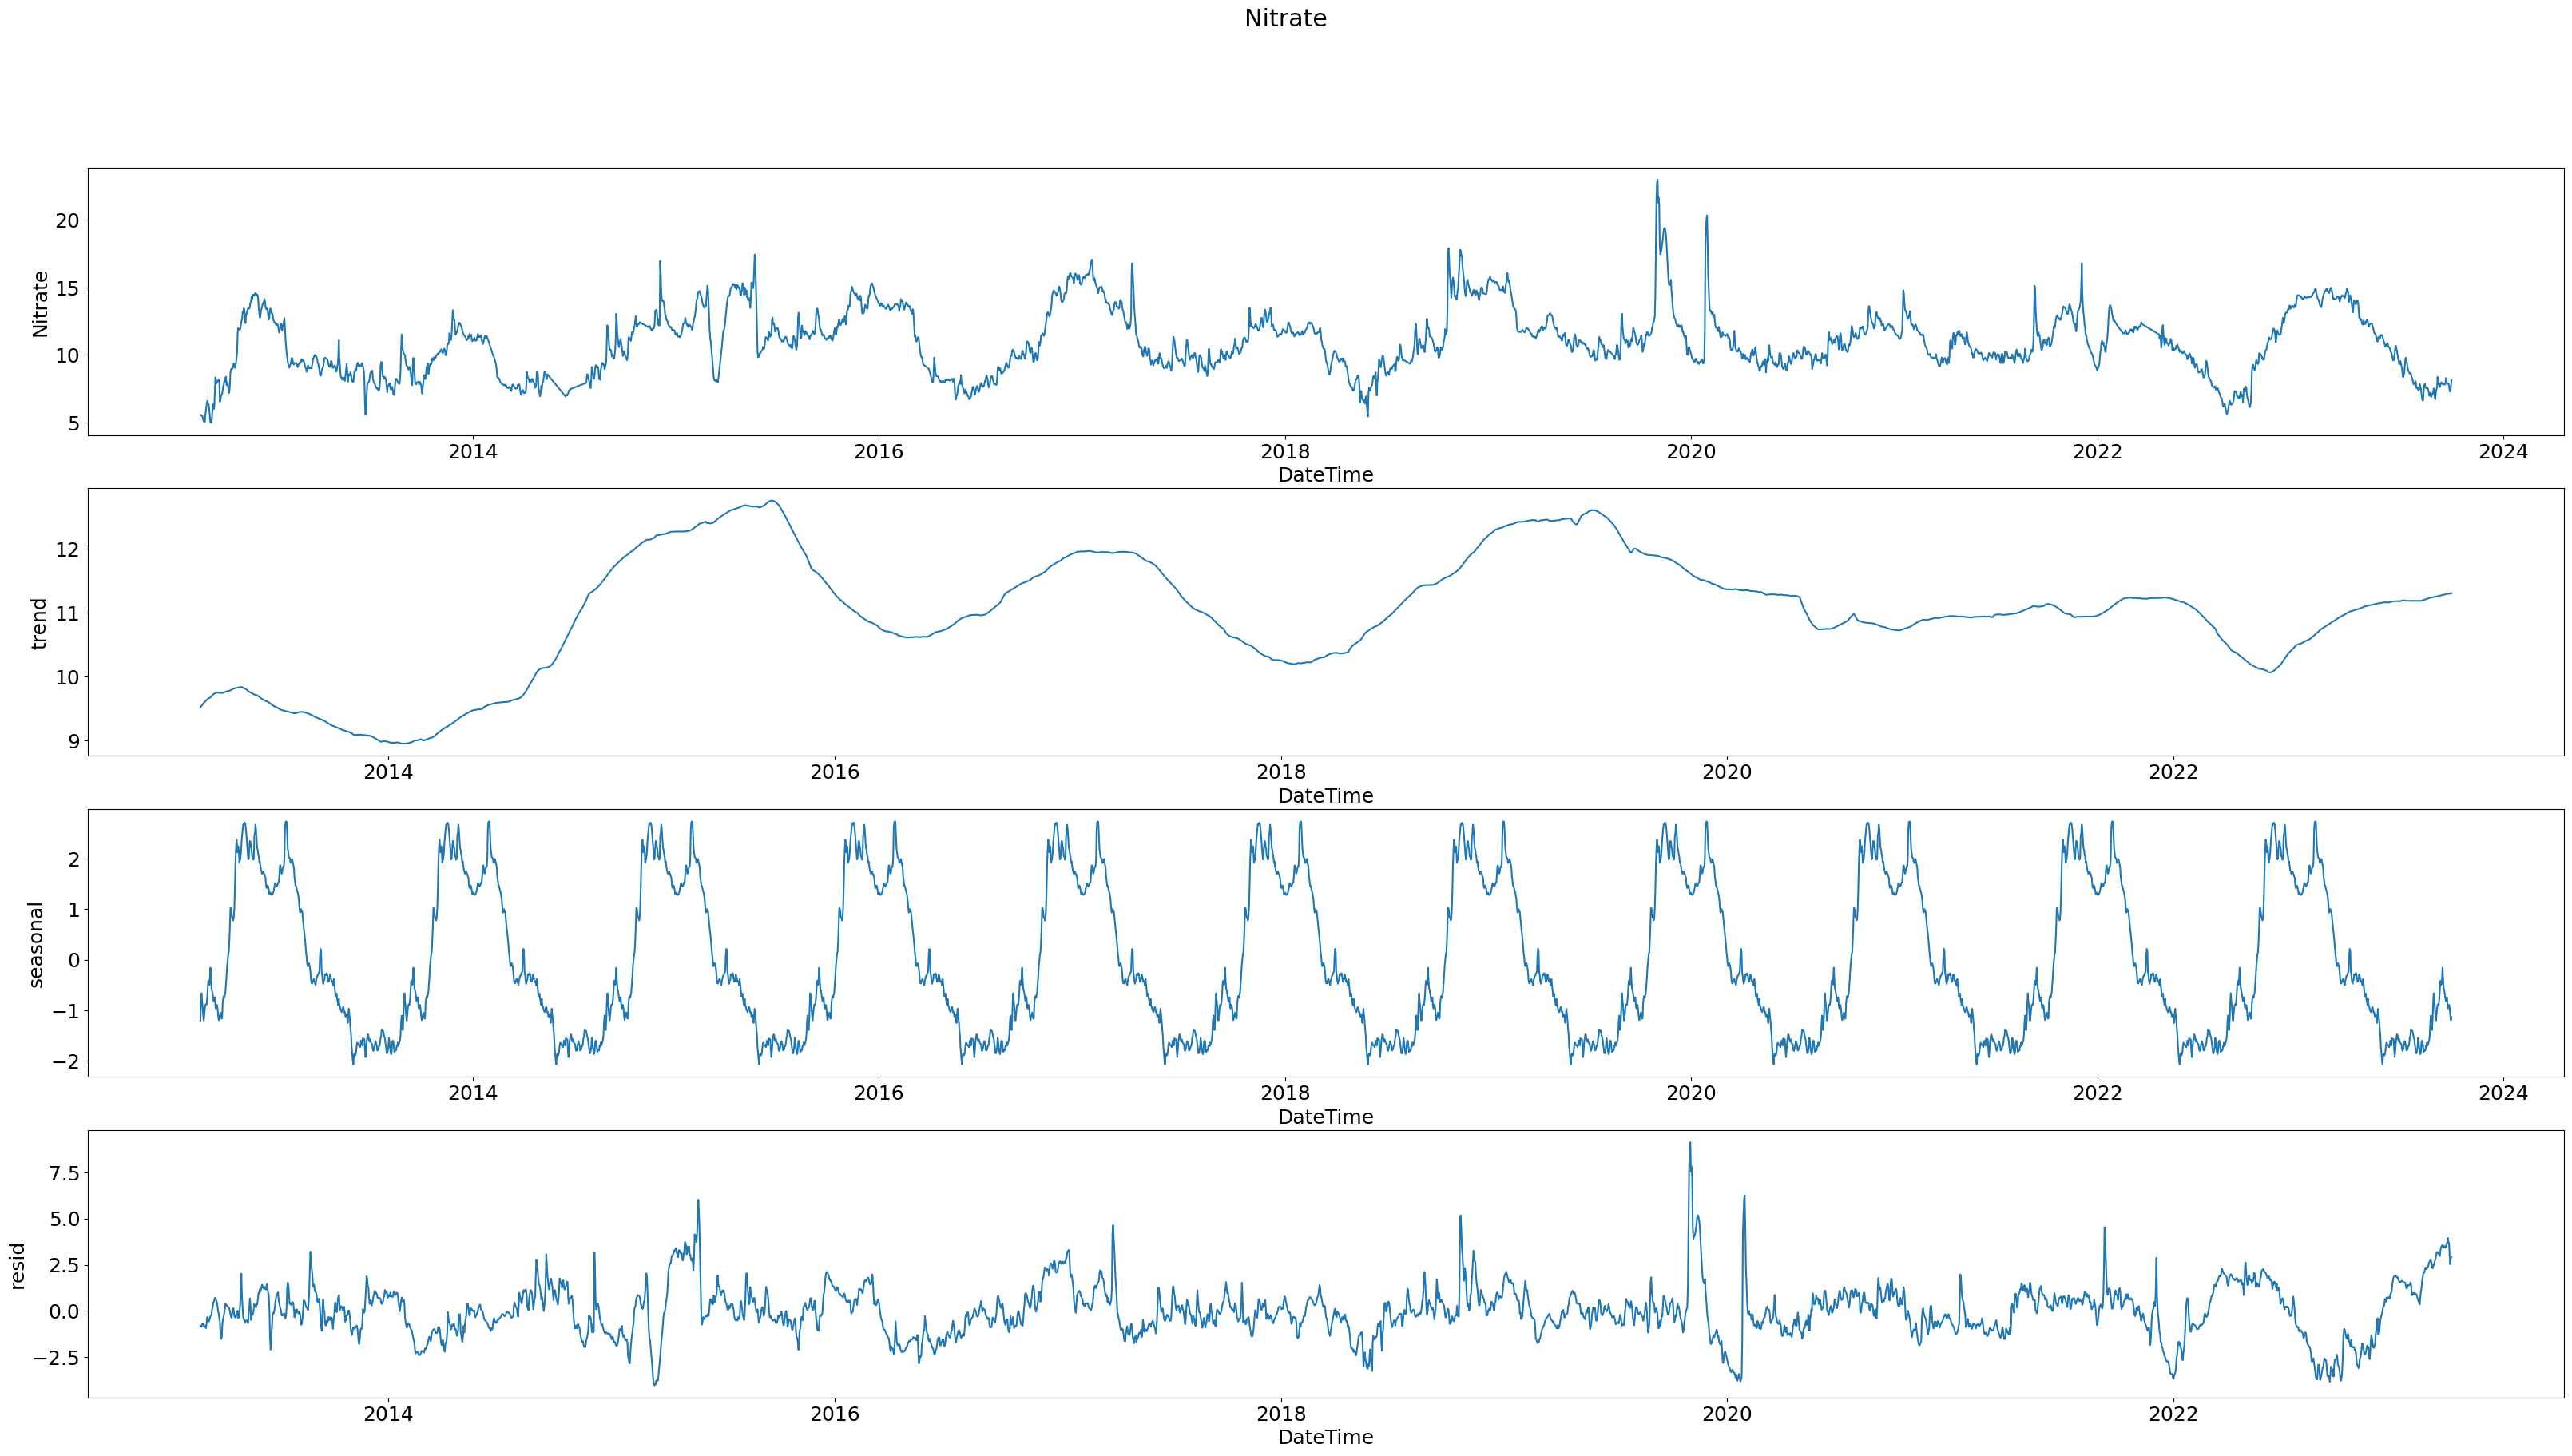

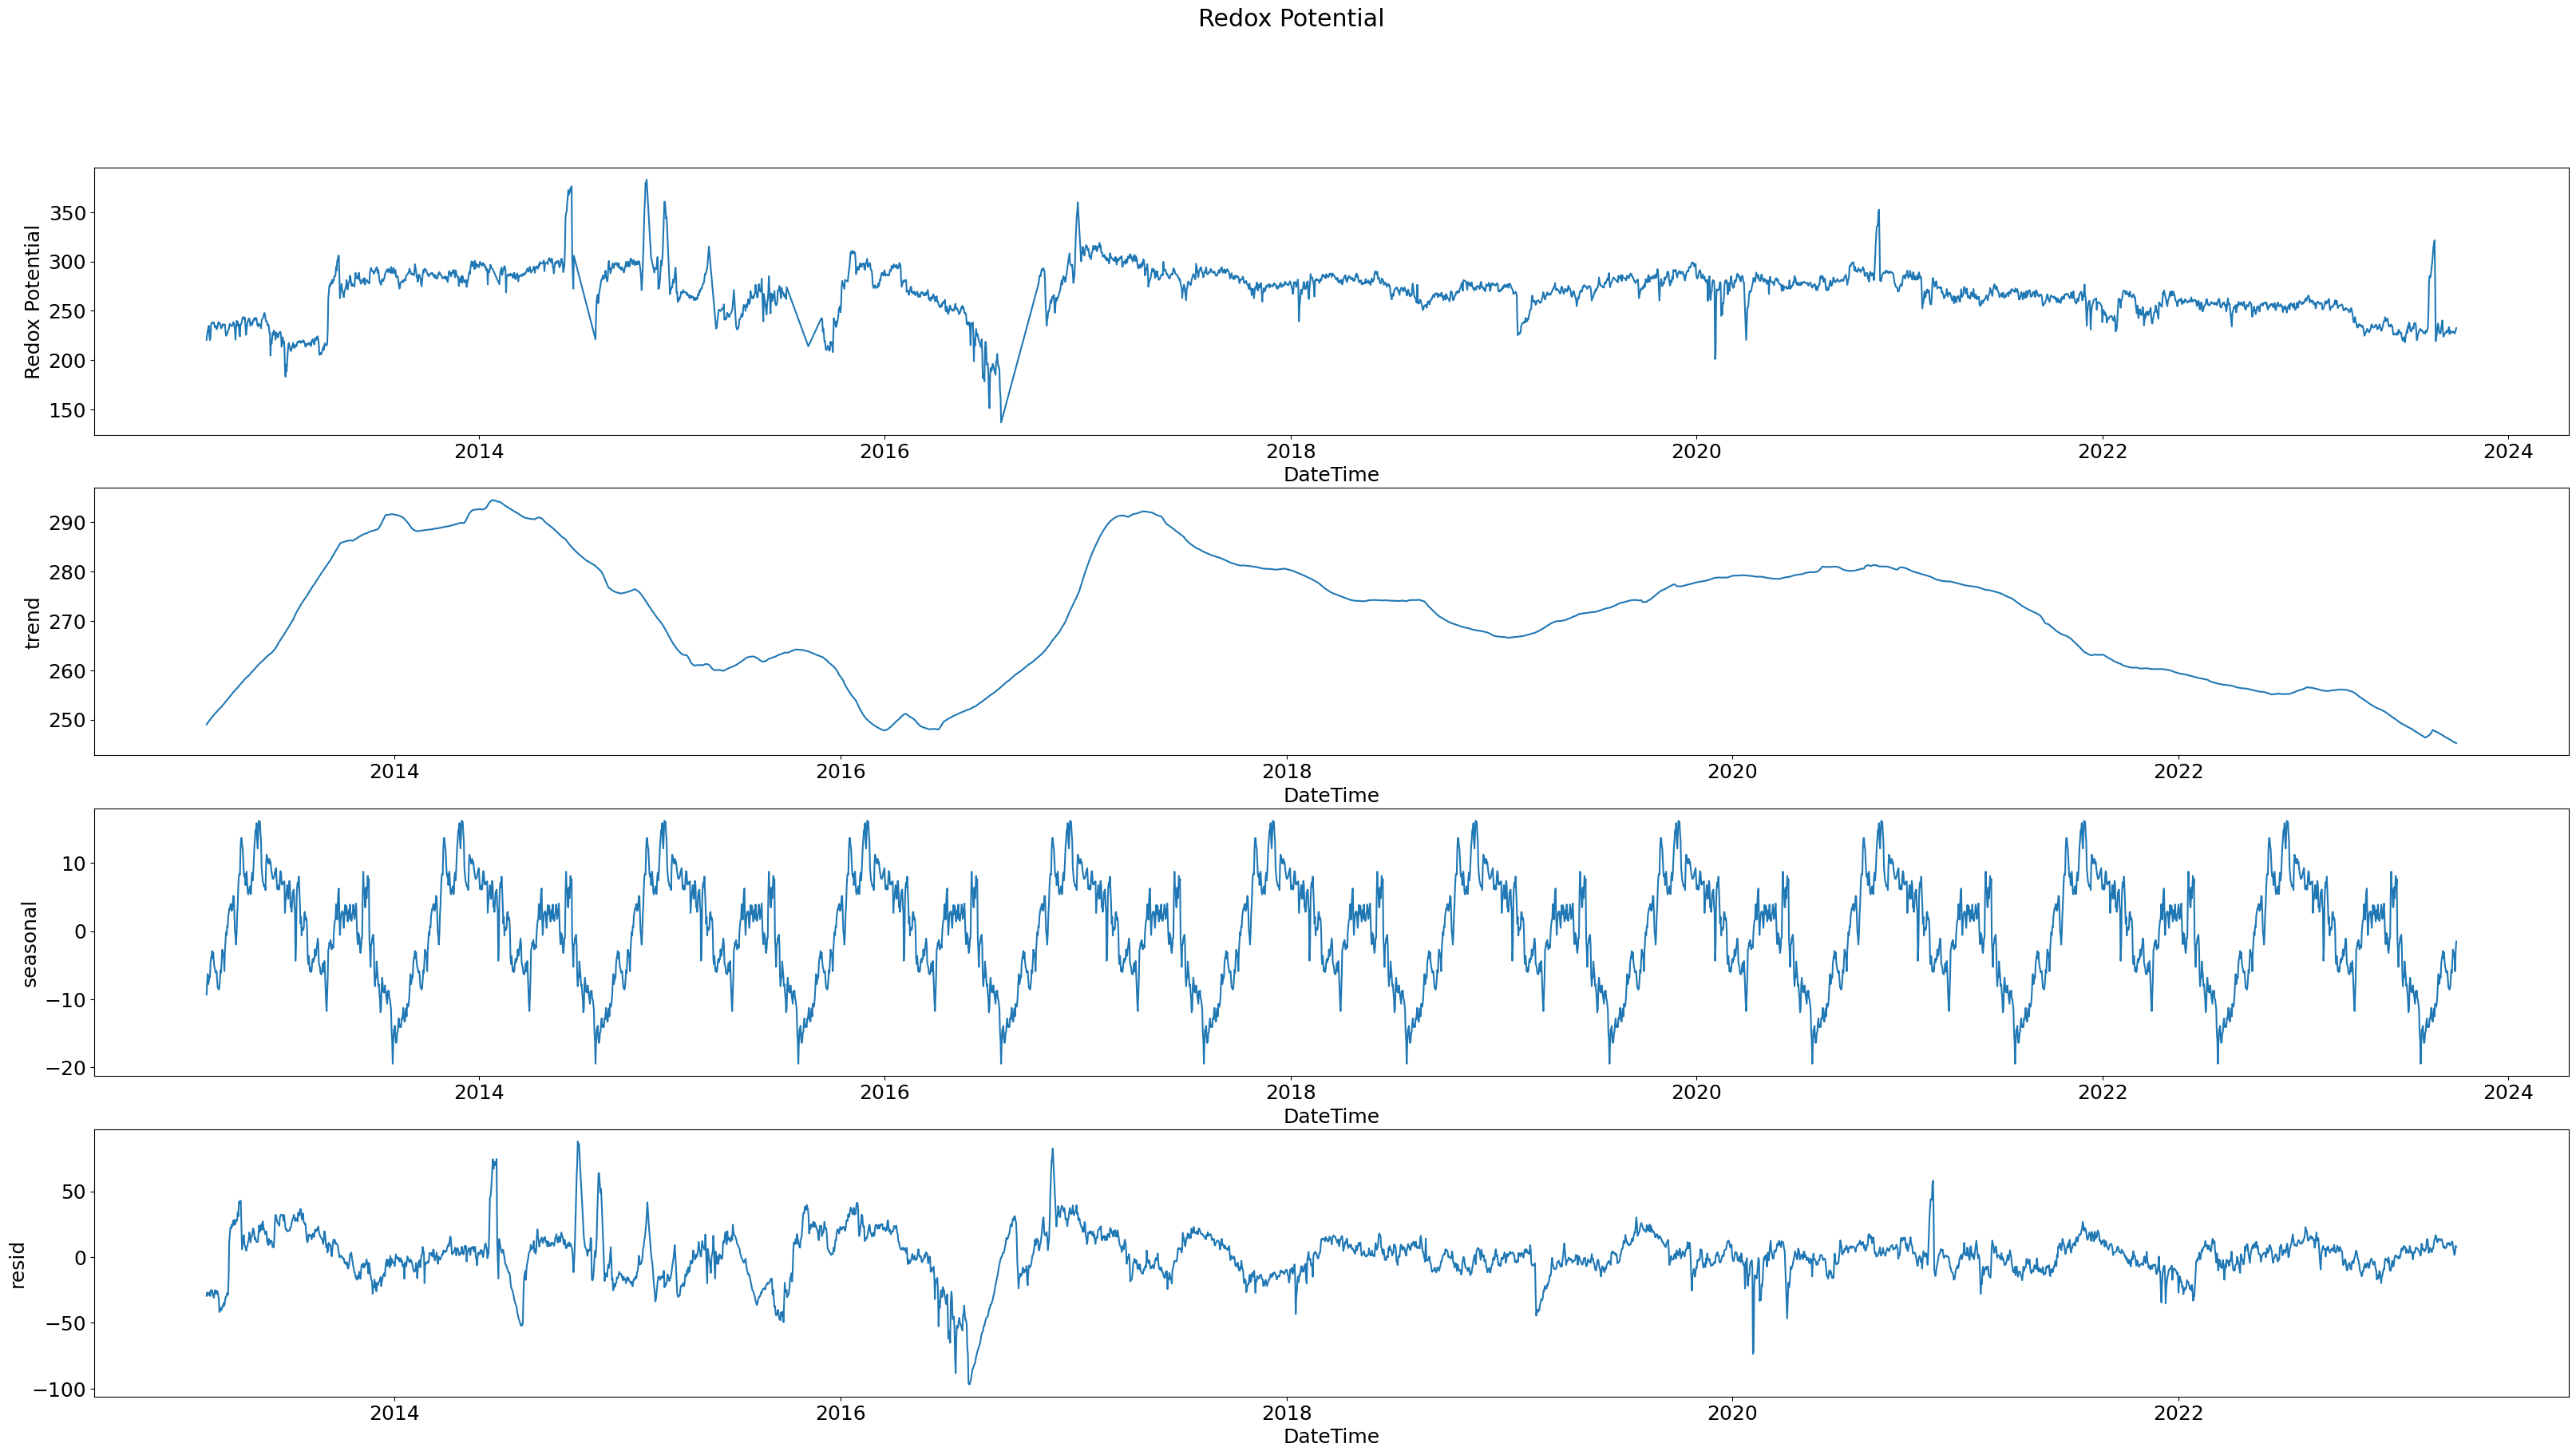

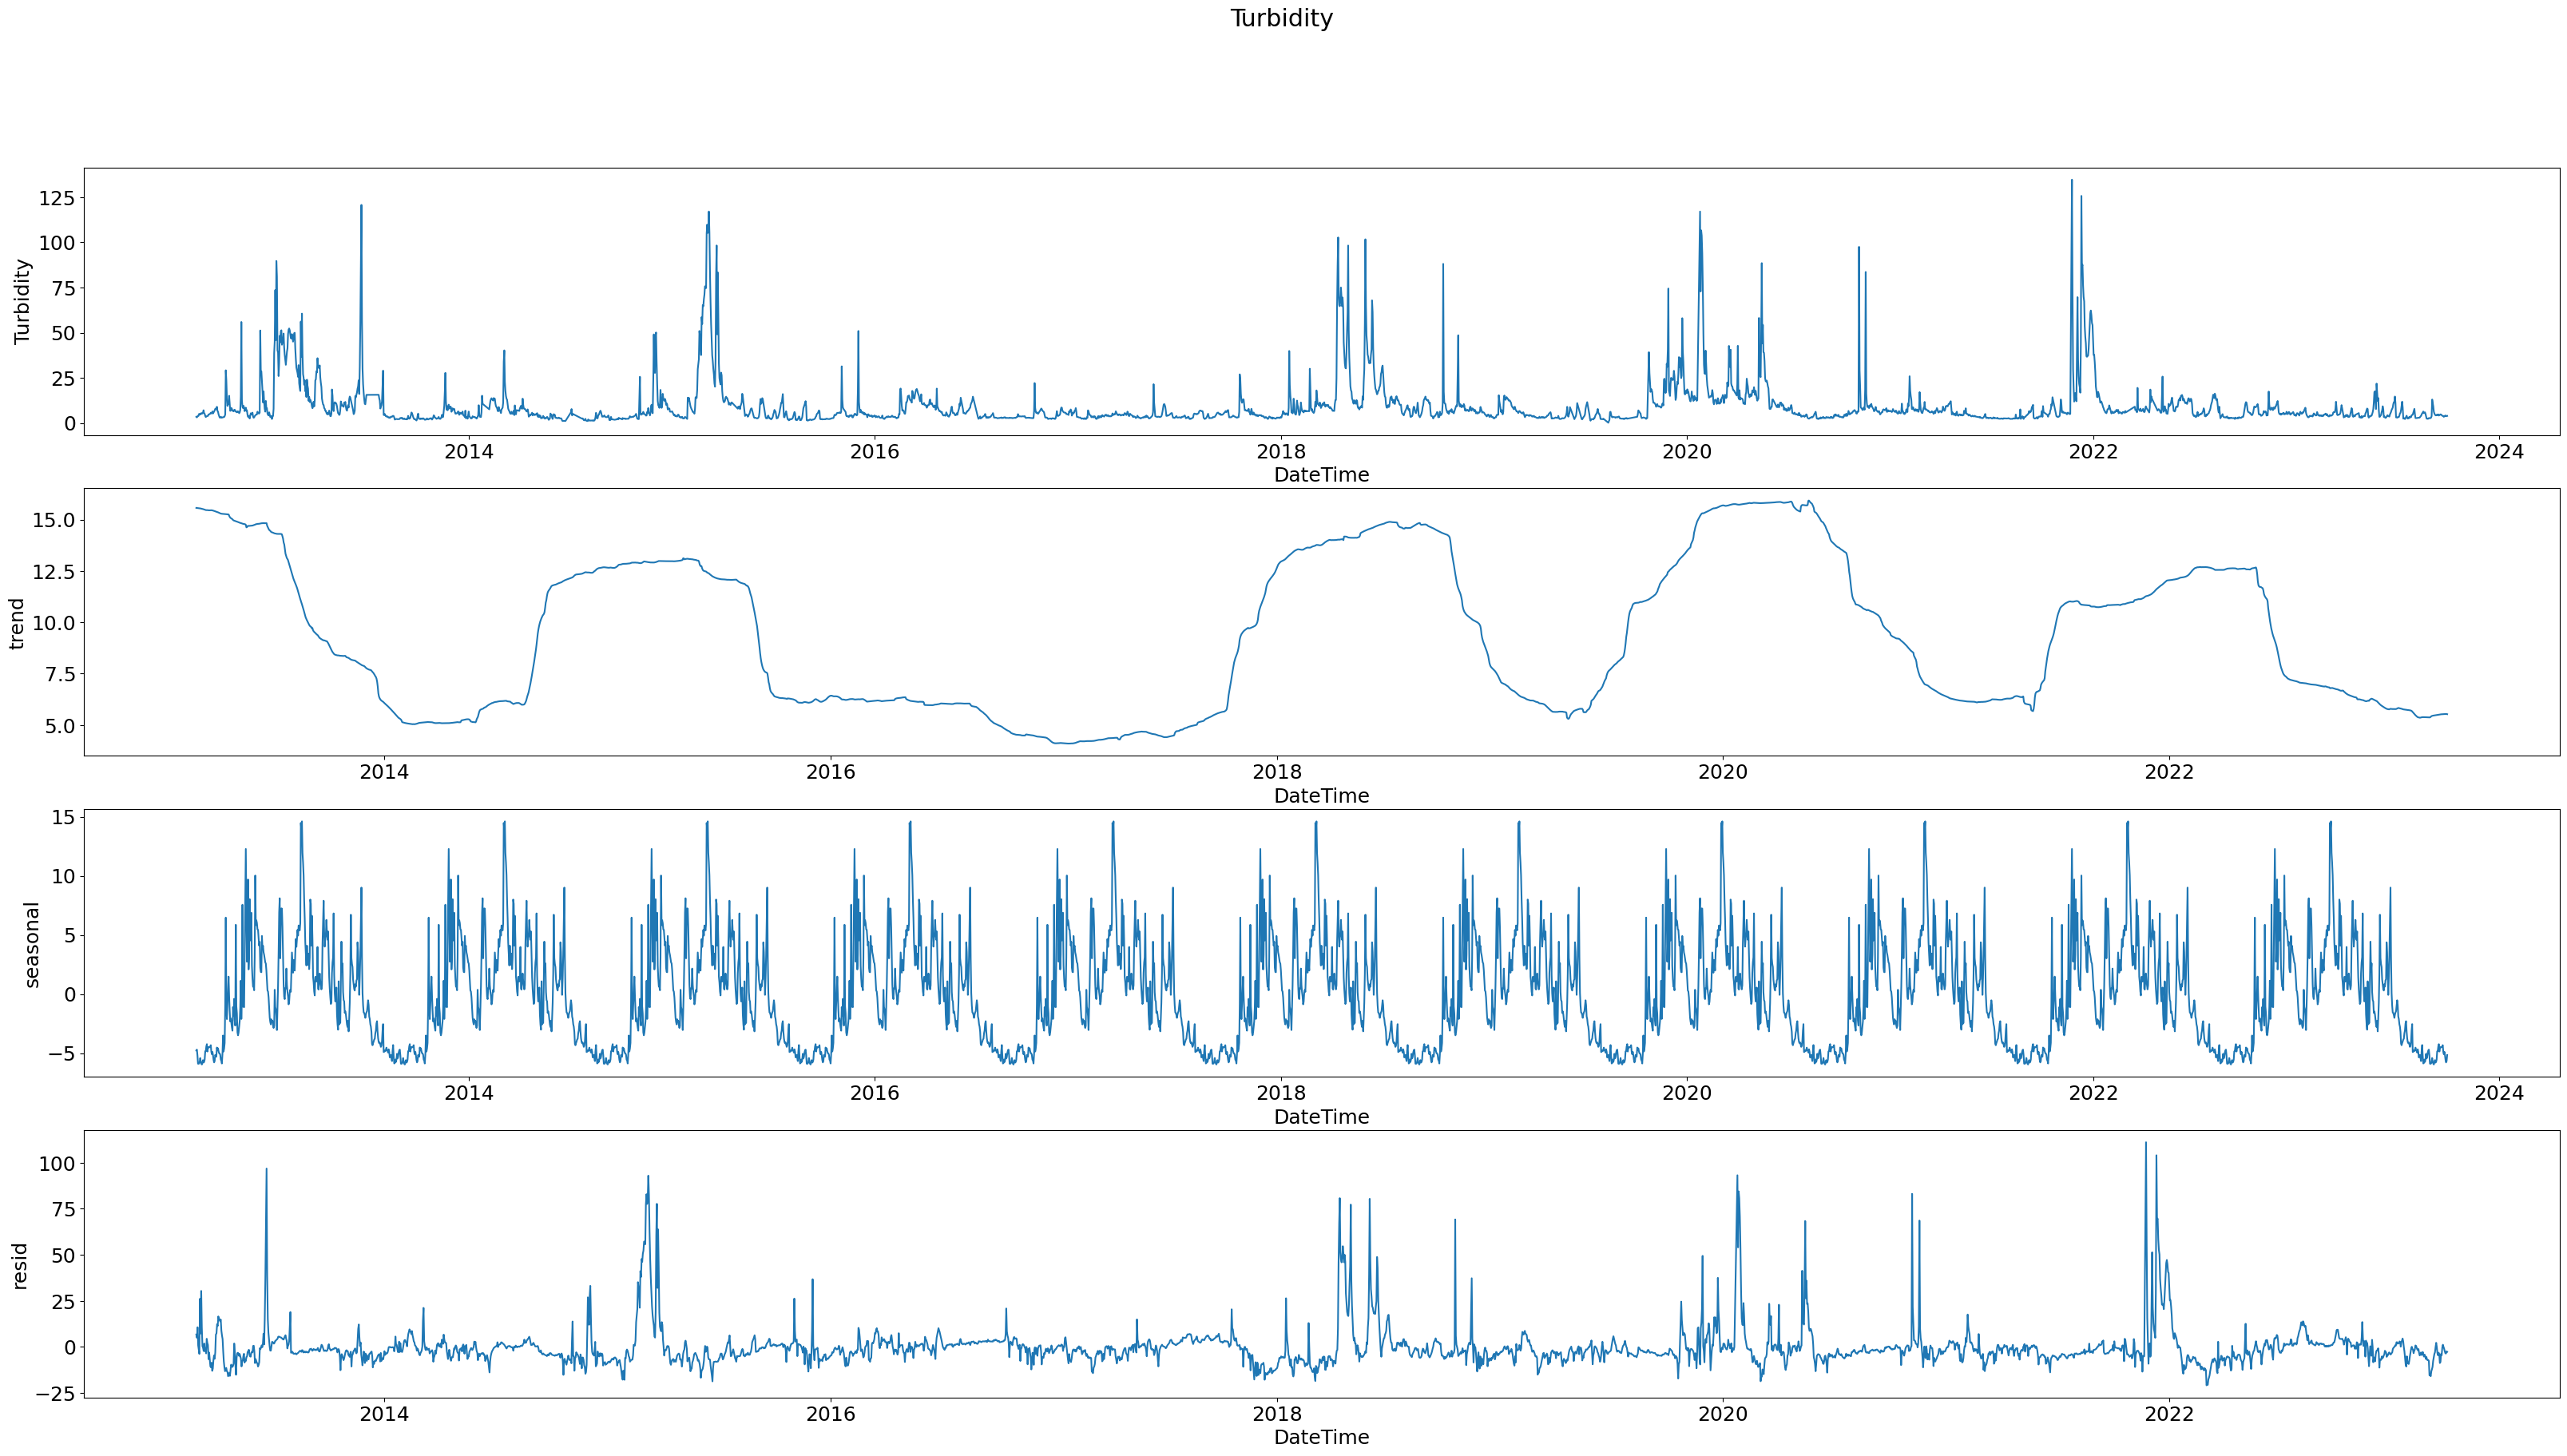

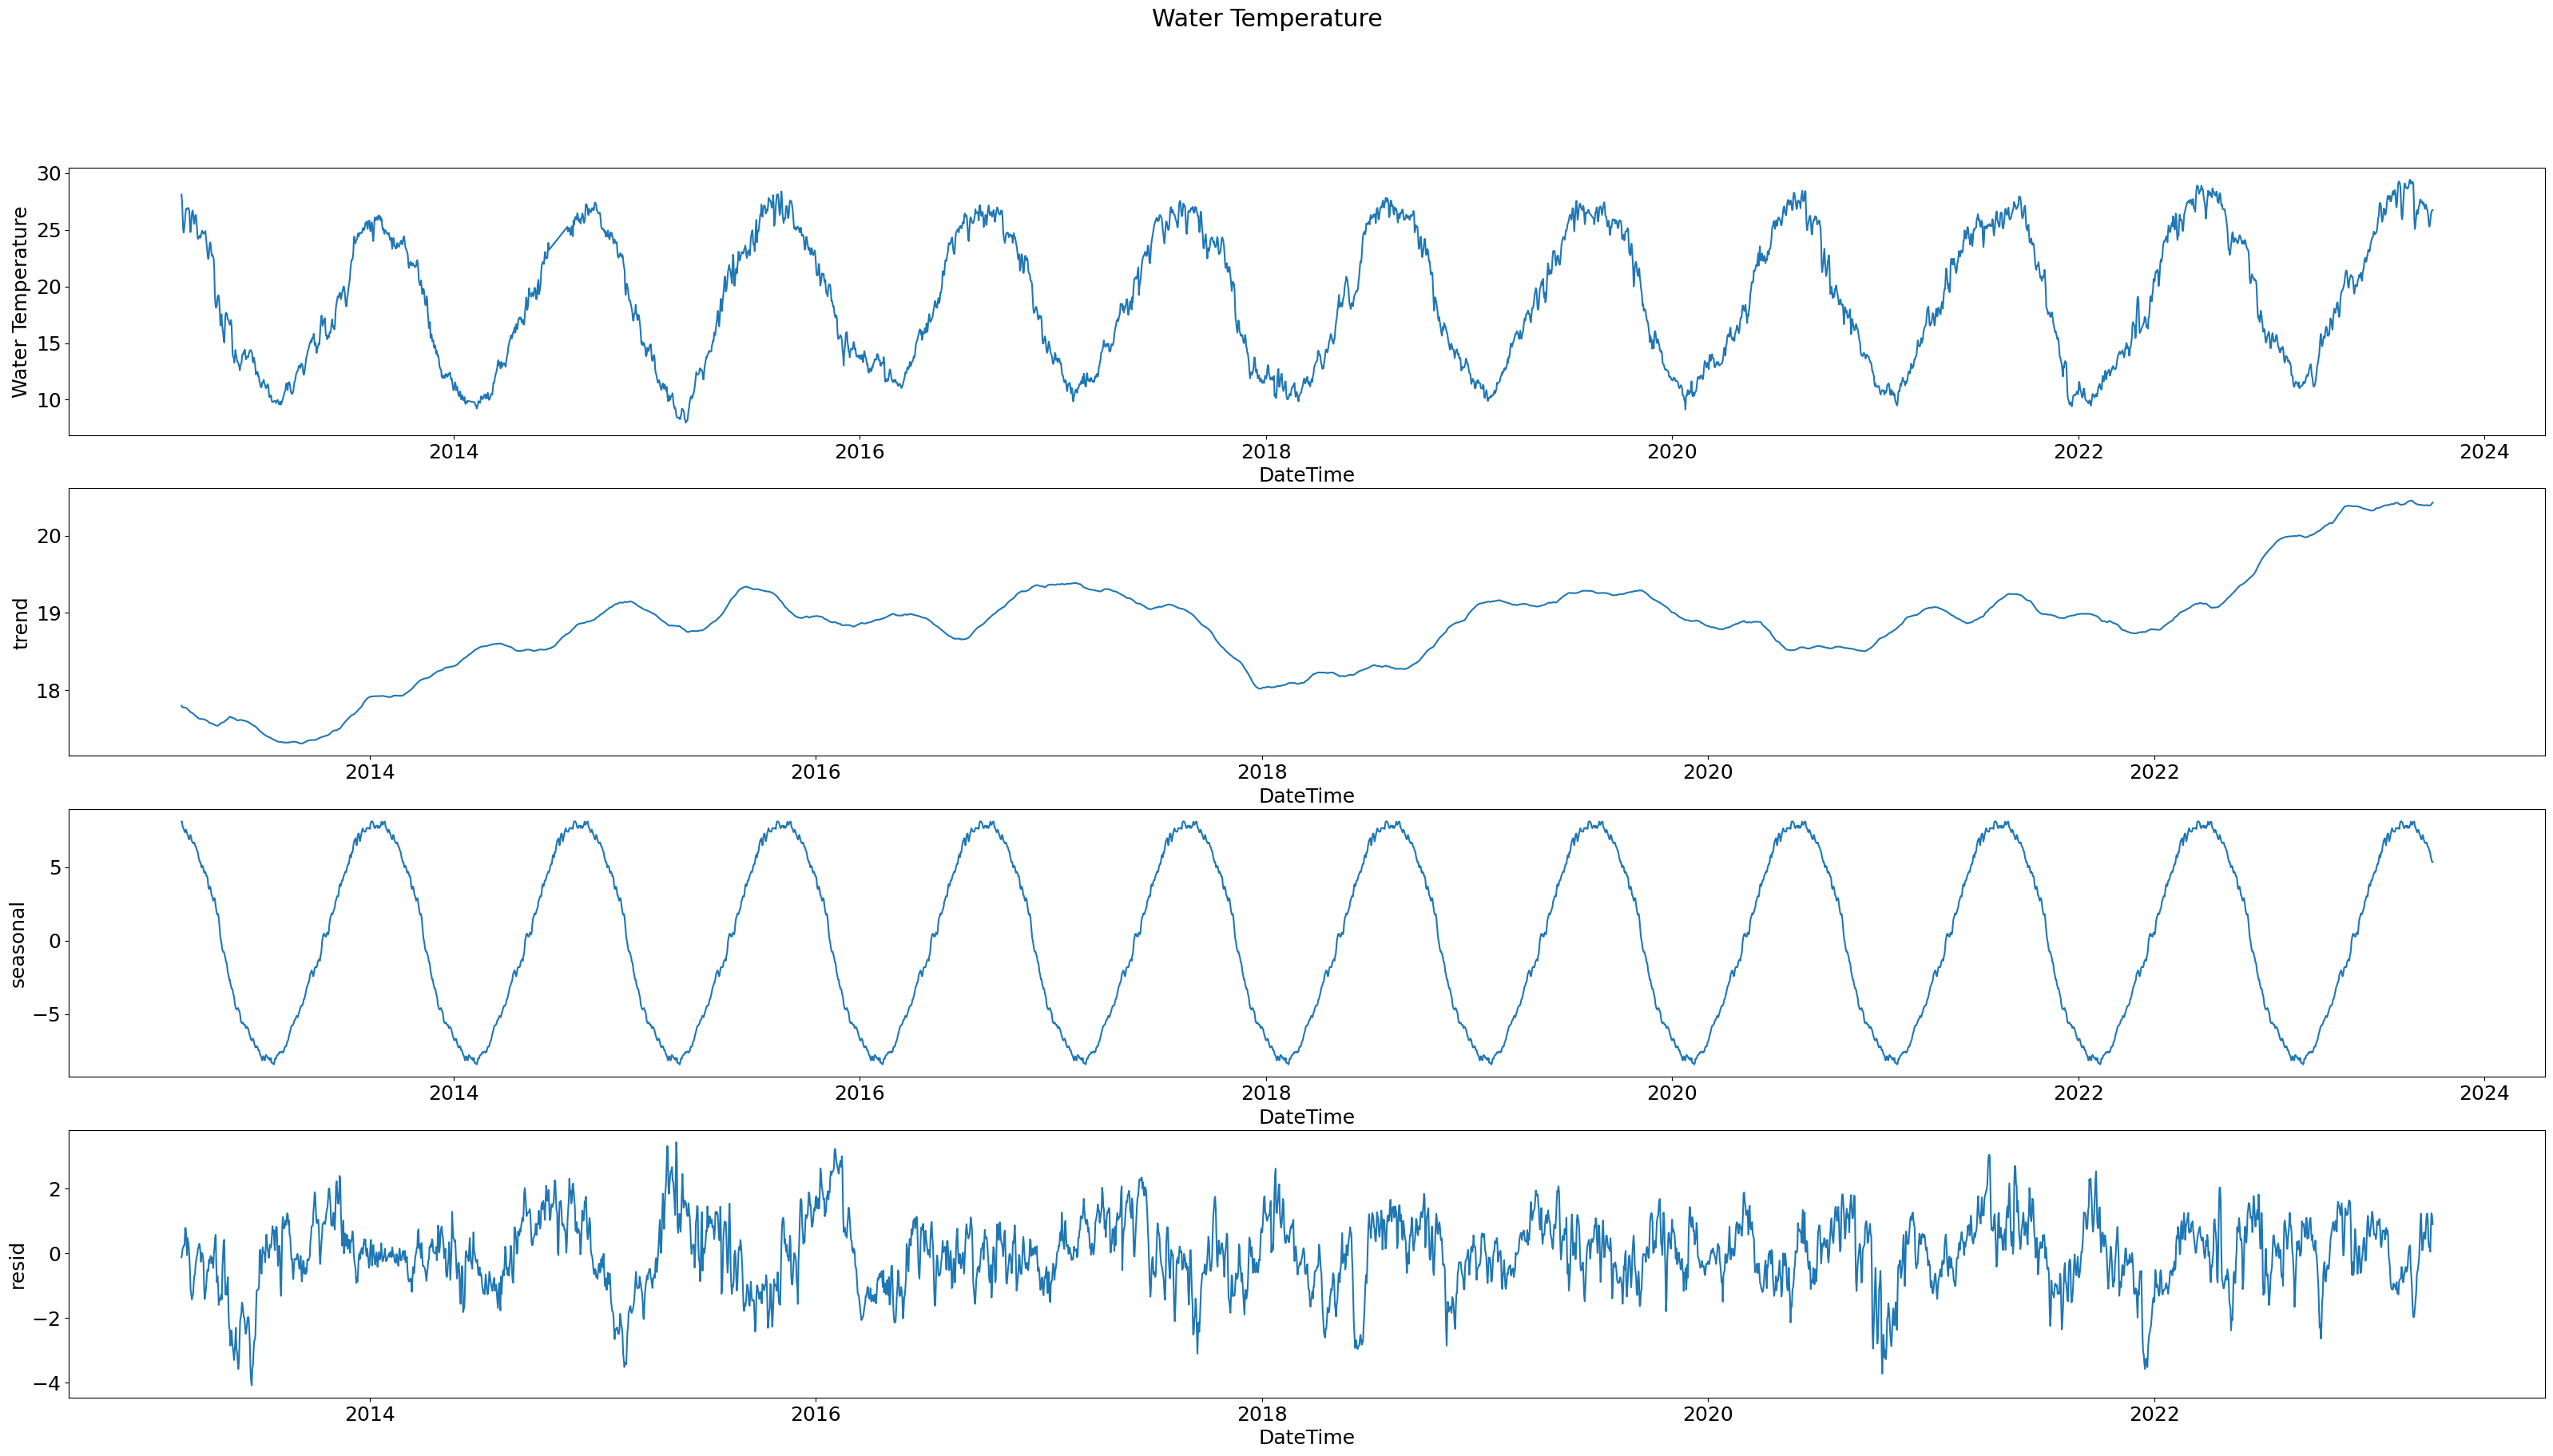

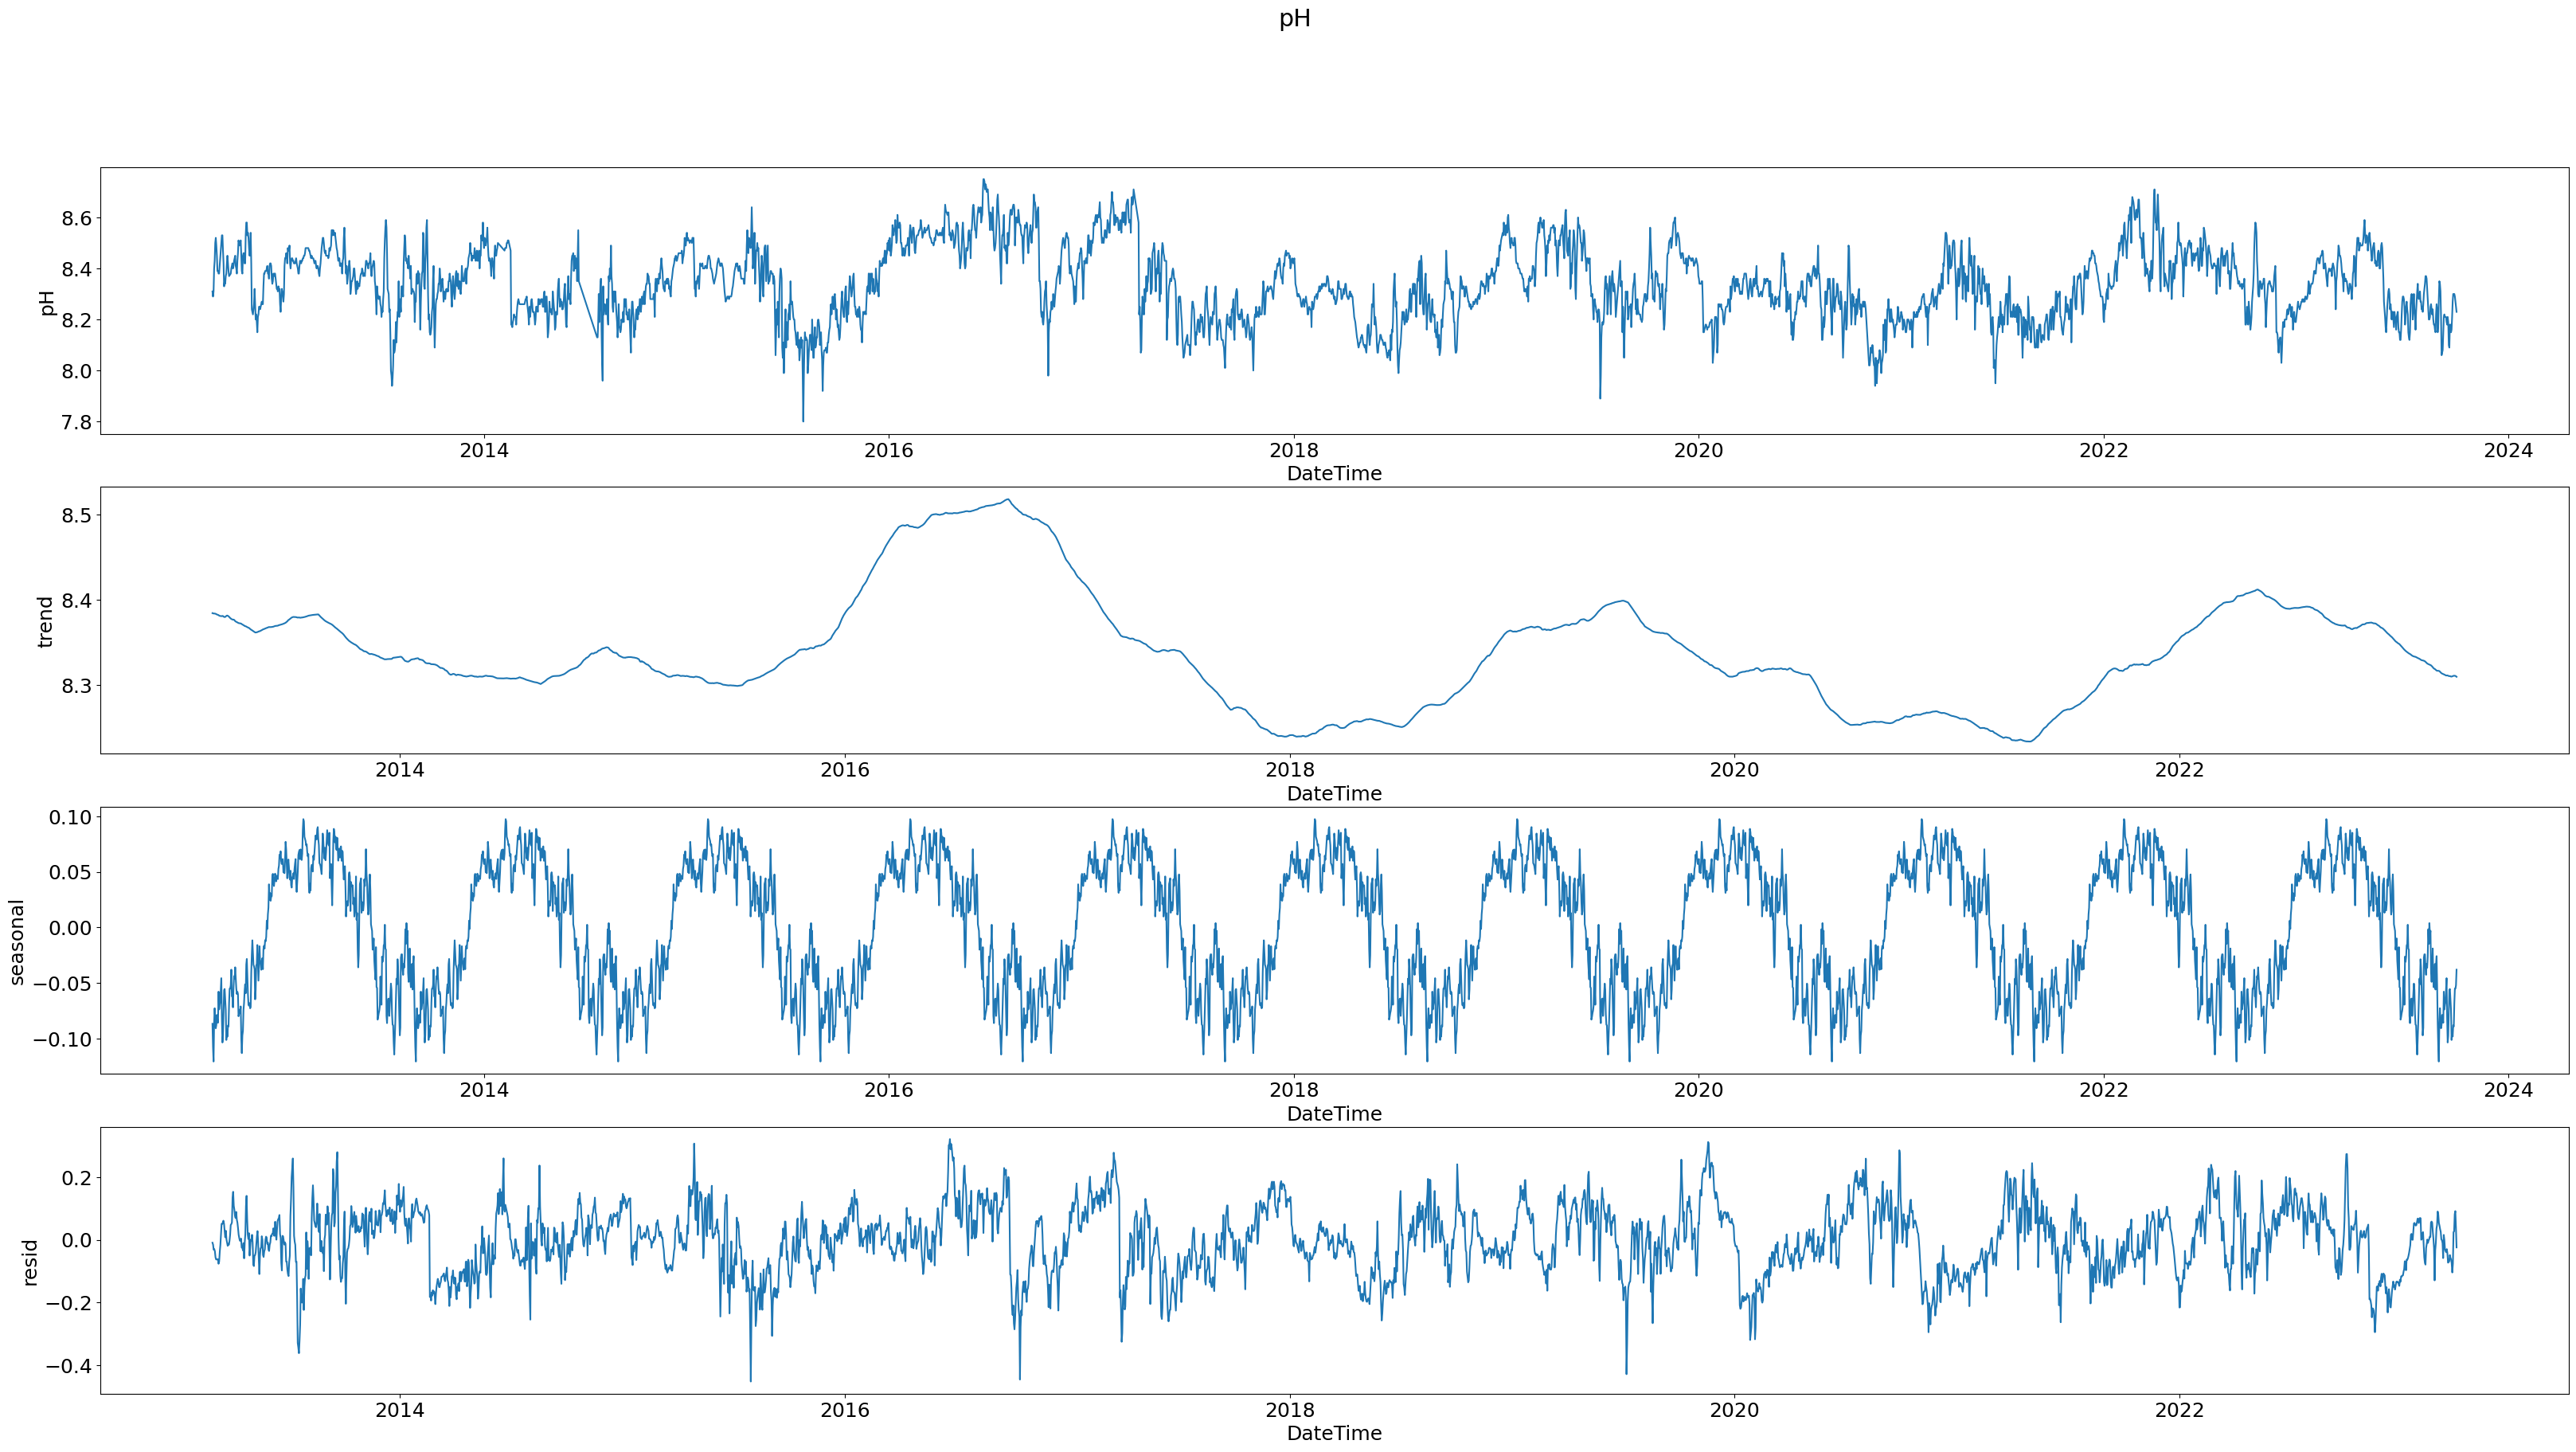

In [90]:
import statsmodels.tsa.seasonal as smt

for feature in xerta_df.columns.difference(['DateTime']):
    result = smt.seasonal_decompose(xerta_df[feature], period=365)
    fig, axs = plt.subplots(4, 1, figsize=(40, 20))
    sns.lineplot(data=result.observed, ax=axs[0])
    sns.lineplot(data=result.trend, ax=axs[1])
    sns.lineplot(data=result.seasonal, ax=axs[2])
    sns.lineplot(data=result.resid, ax=axs[3])
    fig.suptitle(feature)